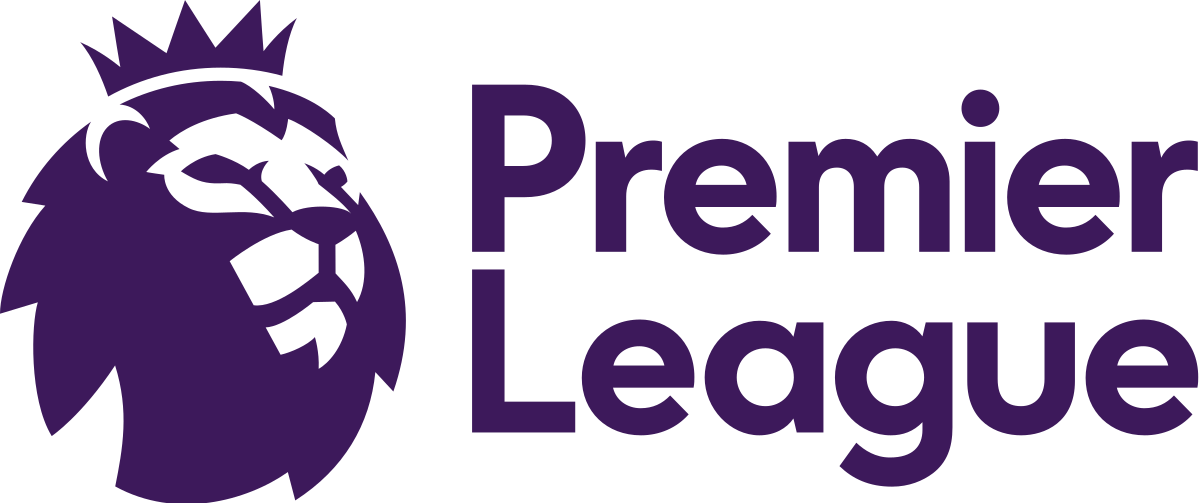

# The Road of Manchester City to the Premier League Cup

--------------

The Premier League is the highest level of the England football. 20 teams play each season. The seasons typically run from August to May with each team playing 38 matches (playing all other teams both home and away)

The Premier League is the most-watched sports league in the world, broadcast in 212 territories to 643 million homes.

The Premier League ranks first in the UEFA coefficients of leagues based on performances in European competitions over the past five seasons as of 2021.

From its beginnig (1992) just seven teams have won the league: 
* Manchester United (13) 
* Manchester City (6) 
* Chelsea (5) 
* Arsenal (3)
* Blackburn Rovers (1)
* Leicester City (1) 
* Liverpool (1) 

This project aims to take a look the seasons from 2014/2015 to 2017/2018, and analize the road of Manchester City to the cup.

I will explore the seasons and try to find out what they have improved to won the cup.

In this four seasons have these champions:
* Season 2014/2015: Chelsea
* Season 2015/2016: Leicester City
* Season 2016/2017: Chelsea
* Season 2017/2018: Manchester City

# Table Content

- [Data Set](#dataSet)
- [Season 2014/2015](#season1415)
    - [Away Matches](#awayMatches1415)
    - [Home Matches](#homeMatches1415)
    - [Goals Result](#goalsResults1415)
    - [Season Stats](#stats1415)
        - [Possession](#possession1415)
        - [Shots](#shots1415)
        - [Shots in the target](#shotsTarget1415)
        - [Passes Precision](#passessPre1415)
        - [Fouls](#fouls1415)
        - [Passes](#passes1415)
    - [Goals](#goals1415)
    - [Summary](#summary1415)
- [Season 2015/2016](#season1516)
    - [Away Matches](#awayMatches1516)
    - [Home Matches](#homeMatches1516)
    - [Goals Result](#goalsResults1516)
    - [Season Stats](#stats1516)
        - [Possession](#possession1516)
        - [Shots](#shots1516)
        - [Shots in the target](#shotsTarget1516)
        - [Passes Precision](#passessPre1516)
        - [Fouls](#fouls1516)
        - [Passes](#passes1516)
    - [Goals](#goals1516)
    - [Summary](#summary1516)
- [Season 2016/2017](#season1617)
    - [Away Matches](#awayMatches1617)
    - [Home Matches](#homeMatches1617)
    - [Goals Result](#goalsResults1617)
    - [Season Stats](#stats1617)
        - [Possession](#possession1617)
        - [Shots](#shots1617)
        - [Shots in the target](#shotsTarget1617)
        - [Passes Precision](#passessPre1617)
        - [Fouls](#fouls1617)
        - [Passes](#passes1617)
    - [Goals](#goals1617)
    - [Summary](#summary1617)
- [Season 2017/2018](#season1718)
    - [Away Matches](#awayMatches1718)
    - [Home Matches](#homeMatches1718)
    - [Goals Result](#goalsResults1718)
    - [Season Stats](#stats1718)
        - [Possession](#possession1718)
        - [Shots](#shots1718)
        - [Shots in the target](#shotsTarget1718)
        - [Passes Precision](#passessPre1718)
        - [Fouls](#fouls1718)
        - [Passes](#passes1718)
    - [Goals](#goals1718)
    - [Summary](#summary1718)
- [Seasons Comparation](#comparation)

## Data Set<a class="anchor" id="dataSet"></a>

We have 2 json files for each season. Each season consists 38 weeks of 10 match a week, so we will have 380 matches in the season

We have the **season_match_stats** files. These cointans general information related with the matches

As the data set is a set of json files, I use pyspark to read them.

In [1]:
import re
import os
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark
import findspark
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

from pyspark.sql.functions import when, explode, lit, col, arrays_zip, to_date
from pyspark.sql.types import DoubleType, StructType, StructField, IntegerType, DecimalType
from pyspark import SparkConf, SparkContext, SQLContext, HiveContext
from pyspark.sql import Row
from math import floor
from plotly.offline import plot, iplot, init_notebook_mode
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

init_notebook_mode(connected=True)
pio.renderers.default='notebook'

In [2]:
pip install kaleido

Note: you may need to restart the kernel to use updated packages.


In [3]:
findspark.init()

In [6]:
sc = pyspark.SparkContext(master="local[1]", appName="PremierLeague_Alejandro_Sandler")

In [7]:
sqlContext = SQLContext(sc)

In [8]:
season_match_stats_14_15 = sqlContext.read.json('./premier/season14-15/season_match_stats.json', multiLine=True)
print("Loaded dataset contains %d matches" % season_match_stats_14_15.count())

Loaded dataset contains 380 matches


In [9]:
season_match_stats_14_15.printSchema()

root
 |-- away_team_id: string (nullable = true)
 |-- away_team_name: string (nullable = true)
 |-- date_string: string (nullable = true)
 |-- full_time_score: string (nullable = true)
 |-- full_time_score_away_team: string (nullable = true)
 |-- full_time_score_home_team: string (nullable = true)
 |-- half_time_score: string (nullable = true)
 |-- half_time_score_away_team: string (nullable = true)
 |-- half_time_score_home_team: string (nullable = true)
 |-- home_team_id: string (nullable = true)
 |-- home_team_name: string (nullable = true)
 |-- match_id: string (nullable = true)



The file **season_match_stats** has general information of the matches, we can see 12 attributes:

- away_team_id: Away team's ID
- away_team_name: Away team's Name
- date_string: Match date
- full_time_score: Final match score, with both away and home scores
- full_time_score_away_team: Final away's score
- full_time_score_home_team: Final home's score
- half_time_score: Half match score, with both away and home scores
- half_time_score_away_team: Half away's score
- half_time_score_home_team: Half home's score
- home_team_id: Home team's ID
- home_team_name: Home team's Name
- match_id: Match's ID

The other file is **season_stats**.

In [10]:
season_stats_14_15 = sqlContext.read.json('./premier/season14-15/season_stats.json', multiLine=True)
print("Loaded dataset contains %d matches" % season_match_stats_14_15.count())

Loaded dataset contains 380 matches


In [11]:
season_stats_14_15.printSchema()

root
 |-- away_team: struct (nullable = true)
 |    |-- Player_stats: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- Match_stats: struct (nullable = true)
 |    |    |    |    |-- accurate_pass: string (nullable = true)
 |    |    |    |    |-- aerial_lost: string (nullable = true)
 |    |    |    |    |-- aerial_won: string (nullable = true)
 |    |    |    |    |-- att_pen_goal: string (nullable = true)
 |    |    |    |    |-- att_pen_target: string (nullable = true)
 |    |    |    |    |-- blocked_scoring_att: string (nullable = true)
 |    |    |    |    |-- clearance_off_line: string (nullable = true)
 |    |    |    |    |-- error_lead_to_goal: string (nullable = true)
 |    |    |    |    |-- formation_place: string (nullable = true)
 |    |    |    |    |-- fouls: string (nullable = true)
 |    |    |    |    |-- goal_assist: string (nullable = true)
 |    |    |    |    |-- goals: string (nullable = true)
 |    |    |    |   

Here we have more details. First at all, we have the match ID, and then we have home's team and away's team information.

As team information we have 3 groups:

- **team_details**: Contains team's general information.
- **aggregate_stats**: Team's stats.
- **Player_stats**: Stats and attributes related with the players.

**team_details**:
- date: Match Date
- team_id: Team's ID
- team_name: Team's name
- team_rating: Ranking of the team

**aggregate_stats**:
- accurate_pass: Passes completed from one player to another (excluding throw-ins, keeper throws and crosses)
- aerial_lost: Unsuccessful aerial duels
- aerial_won: Successful aerial duels
- att_goal_high_centre: Attempt that result in goal, placement high center
- att_goal_high_left: A goal in the top left of the goal
- att_goal_high_right: A goal in the top right of the goal
- att_goal_low_centre: A goal in the bottom center of the goal
- att_goal_low_left: A goal in the bottom left of the goal
- att_goal_low_right: A goal in the bottom right of the goal
- att_miss_high: Attempt that misses - over the crossbar
- att_miss_high_left: Attempt that misses - over the crossbar and left
- att_miss_high_right: Attempt that misses - over the crossbar and right
- att_miss_left: Attempt on goal that miss left
- att_miss_right: Attempt that misses - to the right
- att_pen_goal: A Penalty goal
- att_post_high: A shot that hits the crossbar
- att_post_left: A shot that hits the left post
- att_post_right: A shot that hits the right post
- att_sv_high_centre: A Shot that is saved in the top center part of the goal
- att_sv_high_left: A shot that is saved in the top left of the goal
- att_sv_high_right: A shot that is saved in the top right of the goal
- att_sv_low_centre: A shot that is saved in the bottom centre part of the goal
- att_sv_low_left: A shot that is saved in the low, left part of the goal
- att_sv_low_right: A shot that is saved in the low, right part of the goal
- blocked_scoring_att: Blocked scoring attempt that is on target
- fk_foul_lost: Free kicks conceded to the opposition via fouls, handballs
- goals: Total goals
- ontarget_scoring_att: Shot on target (i.e. applies for a shot that was not blocked, and did not hit woodwork, but may have been saved off the line by a player on the defending team)
- penalty_save: Penalty saved
- possession_percentage: The percentage of overall ball possession the given team had during the game
- post_scoring_att: Shot on goal which hits the post
- shot_off_target: Number of shots off target - shot wide or over the goal
- total_offside: Offside total
- total_pass: Total of all attempted (successful or unsuccessful) passes excluding throw-ins, keeper throws and crosses
- total_scoring_att: Total number of shots at goal (excludes own goals)
- total_tackle: Total number of tackles
- total_throws: Total number of throw-ins
- won_contest: Total dribbles where a team player beats an opponent
- won_corners: Total corners forced by the team

Inside of **Player_stats** we have **Match_stats** and **player_details** for each player.

**player_details**:
 - player_id: Player's ID
 - player_name: Player's Name
 - player_position_info: Player's Position
 - player_position_value: Player's Number
 - player_rating: Ranking of the player

The only categorical variable is **player_position_info**, let's see the different values of this.

In [12]:
sqlContext.sql('DROP TABLE IF EXISTS season_stats_14_15')
sqlContext.registerDataFrameAsTable(season_stats_14_15,'season_stats_14_15')

In [13]:
season_stats_14_15.select(explode("home_team.Player_stats.player_details.player_position_info"
                                 )).groupBy("col").count().orderBy("count", ascending=False).show()

+---+-----+
|col|count|
+---+-----+
|Sub| 2658|
| DC|  793|
| MC|  522|
| FW|  486|
| GK|  380|
|DMC|  362|
| DR|  351|
| DL|  351|
|AMC|  215|
|AML|  154|
|AMR|  154|
| MR|  136|
| ML|  136|
|FWL|   58|
|FWR|   58|
|DML|   12|
|DMR|   12|
+---+-----+



We have 17 positions, where the most are Defender Centre, Midfielder Centre, Wing Forward and Goalkeeper.

- GK: Goalkeeper

Defense
- DL: Defender Left  
- DC: Defender Central  
- DR: Defender Right  

Defensa Media
- DMC: Defensive midfielder Centre
- DML: Defensive Midfielder Left
- DMR: Defensive Midfielder Right

Midfielder
- ML: Midfielder Left
- MC: Midfielder Central 
- MR: Midfielder Right 

Medio Ataque
- AMC: Attacking Midfielder Central
- AML: Attacking Midfielder Left
- AMR: Attacking Midfielder Right 

Forward
- FW: Wing Forward
- FWL: Wing Forward Left 
- FWR: Wing Forward Right 


- Sub: Substitute

Here we have a refence of the positions in the field

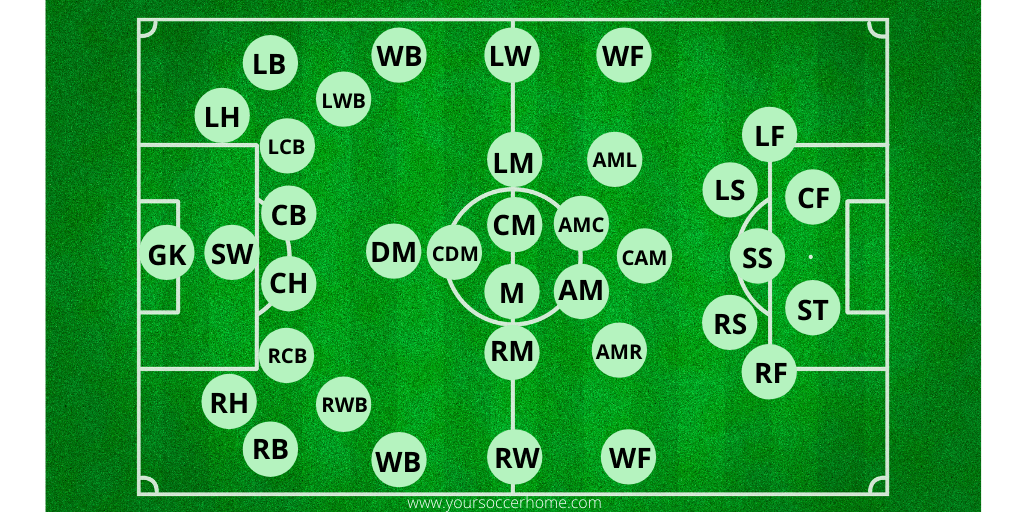

**Match_stats**:
- accurate_pass: Passes completed from one player to another (excluding throw-ins, keeper throws and crosses)
- aerial_lost: Unsuccessful aerial duels
- aerial_won: Successful aerial duels
- att_pen_goal: Penalty goal
- att_pen_target: Penalty that was saved by the goalkeeper
- blocked_scoring_att: Blocked scoring attempt that is on target
- clearance_off_line: Clearance/blocked shot off the line
- error_lead_to_goal: A mistake which leads to the opposition scoring
- formation_place: Place in formation, if subbed in
- fouls: Fouls committed
- goal_assist: Player assists a goal by passing the ball to the player who scored the goal
- goals: Total goals scored
- good_high_claim: Goalkeeper catches a cross
- last_man_tackle: A player makes a defensive action/tackle and is the last person between the opponent and the goal
- man_of_the_match: Player MVP
- own_goals: Total own goals conceded
- penalty_conceded: Penalty awarded against the team in question (including handballs) 
- penalty_save: Penalty save made
- post_scoring_att: Shot on goal which hits the post
- red_card: If player received a red card
- saves: Total number of saves by the goalkeeper
- second_yellow: Yecond yellow card given
- six_yard_block: A shot blocked from an attempt inside the six-yard box
- total_pass: Total of all attempted (successful or unsuccessful) passes excluding throw-ins, keeper throws and crosses
- total_scoring_att: Total number of shots at goal (excludes own goals)
- total_tackle: Total number of tackles
- touches: Total sum of a team’s on-the-ball events
- won_contest: Total dribbles where a team player beats an opponent
- yellow_card: Total yellow cards

As we can see, all the attributes won't be available for all the players, because for example there are attributes that belong to goalkeepers, or maybe the player didn't receive a card.

Let's read now all the files

In [14]:
season_stats_15_16 = sqlContext.read.json('./premier/season15-16/season_stats.json', multiLine=True)
print("Loaded dataset contains %d matches" % season_stats_15_16.count())

Loaded dataset contains 380 matches


In [15]:
season_match_stats_15_16 = sqlContext.read.json('./premier/season15-16/season_match_stats.json', multiLine=True)
print("Loaded dataset contains %d matches" % season_match_stats_15_16.count())

Loaded dataset contains 380 matches


In [16]:
season_stats_16_17 = sqlContext.read.json('./premier/season16-17/season_stats.json', multiLine=True)
print("Loaded dataset contains %d matches" % season_stats_16_17.count())

Loaded dataset contains 380 matches


In [17]:
season_match_stats_16_17 = sqlContext.read.json('./premier/season16-17/season_match_stats.json', multiLine=True)
print("Loaded dataset contains %d matches" % season_match_stats_16_17.count())

Loaded dataset contains 380 matches


In [18]:
season_stats_17_18 = sqlContext.read.json('./premier/season17-18/season_stats.json', multiLine=True)
print("Loaded dataset contains %d matches" % season_stats_17_18.count())

Loaded dataset contains 380 matches


In [19]:
season_match_stats_17_18 = sqlContext.read.json('./premier/season17-18/season_match_stats.json', multiLine=True)
print("Loaded dataset contains %d matches" % season_match_stats_17_18.count())

Loaded dataset contains 380 matches


The Manchester City's ID is 167, let's explore now the four seasons.

## Season 2014/2015<a class="anchor" id="season1415"></a>

In [20]:
MC_14_15 = season_match_stats_14_15.where("home_team_id == '167' OR away_team_id == '167'")
MC_14_15.count()

38

We have the 38 matches of Manchester City, where 19 played away and the other half in home.
I'll see what matchest the team won, lost or drew.

In [21]:
#I create a new column to set the result of the match (Won, Lost, Drawn)
MC_14_15 = MC_14_15.withColumn('result', 
      when(((MC_14_15.home_team_id == '167') & (MC_14_15.full_time_score_home_team.cast('float') > 
                                                MC_14_15.full_time_score_away_team.cast('float'))), lit("Won"))
      .when(((MC_14_15.home_team_id == '167') & (MC_14_15.full_time_score_home_team.cast('float') < 
                                                 MC_14_15.full_time_score_away_team.cast('float'))), lit("Lost"))
      .when(((MC_14_15.away_team_id == '167') & (MC_14_15.full_time_score_away_team.cast('float') > 
                                                 MC_14_15.full_time_score_home_team.cast('float'))), lit("Won"))
      .when(((MC_14_15.away_team_id == '167') & (MC_14_15.full_time_score_away_team.cast('float') < 
                                                 MC_14_15.full_time_score_home_team.cast('float'))), lit("Lost"))
      .otherwise(lit("Drawn")))

### Away Matches<a class="anchor" id="awayMatches1415"></a>

Now, let's start by analyzing the away matches.

In [22]:
MC_14_15.select("away_team_id").where("away_team_id == '167'").groupBy('away_team_id').count().show() 

+------------+-----+
|away_team_id|count|
+------------+-----+
|         167|   19|
+------------+-----+



We have the 19 matches that the team played away, let's see the results.

In [23]:
 MC_14_15_away_results = MC_14_15.select("away_team_id", "result")\
    .where("away_team_id == '167'")\
    .groupBy('away_team_id', "result")\
    .count()
    
MC_14_15_away_results = MC_14_15_away_results.withColumnRenamed('count', 'matches')
MC_14_15_away_results.show()

+------------+------+-------+
|away_team_id|result|matches|
+------------+------+-------+
|         167|   Won|     10|
|         167| Drawn|      4|
|         167|  Lost|      5|
+------------+------+-------+



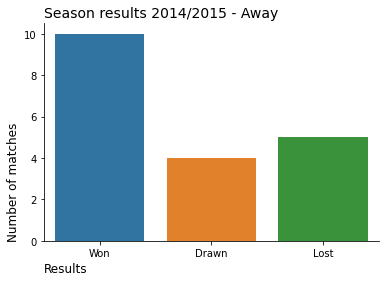

In [24]:
MC_14_15_home_results_PD = MC_14_15.where("away_team_id == '167'").toPandas()
MC_14_15_home_results_plot = sns.countplot(data=MC_14_15_home_results_PD, x="result")
MC_14_15_home_results_plot.set_ylabel('Number of matches', loc="bottom", fontsize=12)
MC_14_15_home_results_plot.set_xlabel('Results', loc="left", fontsize=12)
MC_14_15_home_results_plot.set_title('Season results 2014/2015 - Away', loc="left", fontsize=14)
sns.despine()

The team won 10 of 19 matches, so the team won almost half of the matches. In this way, the team lost 19 points.

Let's explore the lost matches, and check the results.

In [25]:
#I get the scores of the matches away that Manchester City lost
MC_14_15.select('home_team_name', "full_time_score_home_team", "full_time_score_away_team")\
        .where("away_team_id == '167' AND result == 'Lost'")\
        .withColumnRenamed('home_team_name', 'Home Team Name')\
        .withColumnRenamed('full_time_score_home_team', 'Final Score Home Team')\
        .withColumnRenamed('full_time_score_away_team', 'Final Score Manchester City').show() 

+-----------------+---------------------+---------------------------+
|   Home Team Name|Final Score Home Team|Final Score Manchester City|
+-----------------+---------------------+---------------------------+
|         West Ham|                    2|                          1|
|Manchester United|                    4|                          2|
|   Crystal Palace|                    2|                          1|
|          Burnley|                    1|                          0|
|        Liverpool|                    2|                          1|
+-----------------+---------------------+---------------------------+



From above we can see the 5 matches that the team lost, let's explore them.

In [27]:
#I cast the scores to interger in order to allow to compare them
MC_14_15 = MC_14_15.withColumn("half_time_score_home_team", MC_14_15["half_time_score_home_team"].cast(IntegerType()))
MC_14_15 = MC_14_15.withColumn("half_time_score_away_team", MC_14_15["half_time_score_away_team"].cast(IntegerType()))
MC_14_15 = MC_14_15.withColumn("full_time_score_home_team", MC_14_15["full_time_score_home_team"].cast(IntegerType()))
MC_14_15 = MC_14_15.withColumn("full_time_score_away_team", MC_14_15["full_time_score_away_team"].cast(IntegerType()))
MC_14_15 = MC_14_15.withColumn("date_string", to_date(col("date_string"), 'dd/MM/yyyy HH:mm:ss'))

In [28]:
#I get the matches that Manchester City lost where they ended the first half lossing
MC_14_15.select("half_time_score_home_team", "half_time_score_away_team", "full_time_score_home_team",
                  "full_time_score_away_team", 'home_team_name').where(
                "away_team_id == '167' AND result == 'Lost' AND half_time_score_home_team > half_time_score_away_team")\
                .withColumnRenamed('half_time_score_home_team', 'Half Time Score Home team')\
                .withColumnRenamed('half_time_score_away_team', 'Halg Time Score Manchester City')\
                .withColumnRenamed('full_time_score_home_team', 'Final Score Home team')\
                .withColumnRenamed('full_time_score_away_team', 'Final Score Manchester City')\
                .withColumnRenamed('home_team_name', 'Home Team Name').show() 

+-------------------------+-------------------------------+---------------------+---------------------------+-----------------+
|Half Time Score Home team|Halg Time Score Manchester City|Final Score Home team|Final Score Manchester City|   Home Team Name|
+-------------------------+-------------------------------+---------------------+---------------------------+-----------------+
|                        1|                              0|                    2|                          1|         West Ham|
|                        2|                              1|                    4|                          2|Manchester United|
|                        1|                              0|                    2|                          1|   Crystal Palace|
+-------------------------+-------------------------------+---------------------+---------------------------+-----------------+



In 3 of the 5 matches that the team lost, the team finished the first half loosing.
The other two matches the team lost only with 1 goal against of difference and in the second half.

Let's explore now the draws.

In [29]:
#I get the drawn matches
MC_14_15.select("half_time_score_home_team", "half_time_score_away_team", "full_time_score_home_team",
                  'home_team_name')\
                .where("away_team_id == '167' AND result == 'Drawn'")\
                .withColumnRenamed('half_time_score_home_team', 'Half Time - Home Team')\
                .withColumnRenamed('half_time_score_away_team', 'Half Time MC')\
                .withColumnRenamed('full_time_score_home_team', 'Final Score')\
                .withColumnRenamed('home_team_name', 'Home Team Name').show() 

+---------------------+------------+-----------+-------------------+
|Half Time - Home Team|Half Time MC|Final Score|     Home Team Name|
+---------------------+------------+-----------+-------------------+
|                    0|           1|          2|            Arsenal|
|                    1|           1|          2|Queens Park Rangers|
|                    0|           0|          1|            Everton|
|                    1|           1|          1|            Chelsea|
+---------------------+------------+-----------+-------------------+



These matches were very competitives, and with teams where we can expect this result.

### Home Matches<a class="anchor" id="homeMatches1415"></a>

Let's explore now the team's matches in home.

In [30]:
MC_14_15_home_results =  MC_14_15.select("home_team_id", "result").where("home_team_id == '167'").groupBy(
    'home_team_id', "result").count()
MC_14_15_home_results = MC_14_15_home_results.withColumnRenamed('count', 'matches')
MC_14_15_home_results.show()

+------------+------+-------+
|home_team_id|result|matches|
+------------+------+-------+
|         167|   Won|     14|
|         167| Drawn|      3|
|         167|  Lost|      2|
+------------+------+-------+



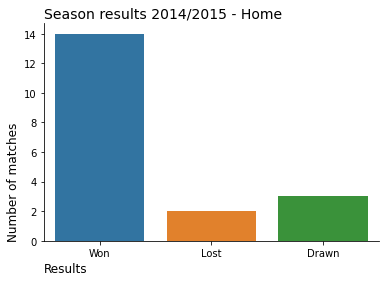

In [31]:
MC_14_15_home_results_PD = MC_14_15.where("home_team_id == '167'").toPandas()
MC_14_15_home_results_plot = sns.countplot(data=MC_14_15_home_results_PD, x="result")
MC_14_15_home_results_plot.set_ylabel('Number of matches', loc="bottom", fontsize=12)
MC_14_15_home_results_plot.set_xlabel('Results', loc="left", fontsize=12)
MC_14_15_home_results_plot.set_title('Season results 2014/2015 - Home', loc="left", fontsize=14)
sns.despine()

In home, the team won most of the matches. They just lost 2 of them.

Let's see the lost matches.

In [32]:
MC_14_15.select("half_time_score_home_team", "half_time_score_away_team", "full_time_score_home_team",
                  "full_time_score_away_team", 'away_team_name')\
.withColumnRenamed('half_time_score_home_team', 'Half Time Score Manchester City')\
.withColumnRenamed('half_time_score_away_team', 'Half Time Score Away Team')\
.withColumnRenamed('full_time_score_home_team', 'Final Score Manchester City')\
.withColumnRenamed('full_time_score_away_team', 'Final Score Away Team')\
.withColumnRenamed('away_team_name', 'Away Team')\
.where("home_team_id == '167' AND result == 'Lost'").show() 

+-------------------------------+-------------------------+---------------------------+---------------------+---------+
|Half Time Score Manchester City|Half Time Score Away Team|Final Score Manchester City|Final Score Away Team|Away Team|
+-------------------------------+-------------------------+---------------------------+---------------------+---------+
|                              0|                        0|                          0|                    1|    Stoke|
|                              0|                        1|                          0|                    2|  Arsenal|
+-------------------------------+-------------------------+---------------------------+---------------------+---------+



The matches that the team lost were by few goals against.

---------------------

### Goals and general results<a class="anchor" id="goalsResults1415"></a>

Let's see now the Goals For and Against of the team.

In [33]:
#I get the goals for done in home
MC_14_15_goals_for_home = MC_14_15.groupBy('home_team_id').sum('full_time_score_home_team').where(
                        "home_team_id == '167'").withColumnRenamed('sum(full_time_score_home_team)', 'goals_for'
                                                                  ).withColumnRenamed('home_team_id', 'team')
#I get the goals for done away
MC_14_15_goals_for_away = MC_14_15.groupBy('away_team_id').sum('full_time_score_away_team').where(
                        "away_team_id == '167'").withColumnRenamed('sum(full_time_score_away_team)', 'goals_for'
                                                                  ).withColumnRenamed('away_team_id', 'team')

#Get all goals for by union both home and away
MC_14_15_goals_for = MC_14_15_goals_for_home.union(MC_14_15_goals_for_away).groupBy('team').sum('goals_for'
                                                ).withColumnRenamed('sum(goals_for)', 'goals_for')

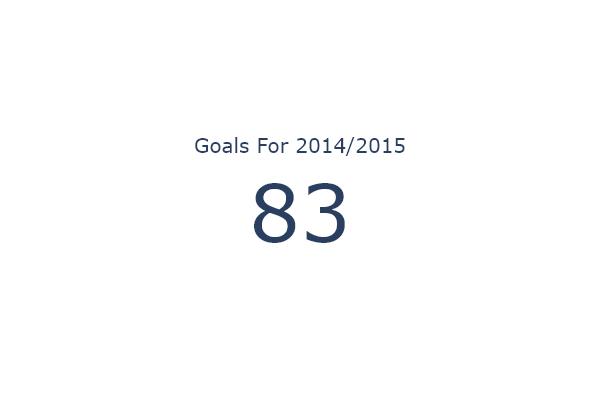

In [34]:
goals_for_14_15 = MC_14_15_goals_for.select("goals_for").collect()[0][0]
fig = go.Figure()
fig.add_trace(go.Indicator(
    mode = "number",
    value = goals_for_14_15,
    title = {"text": "Goals For 2014/2015", 'align': "center"},
    domain = {'x': [0, 1], 'y': [0, 1]}
    ))
fig.update_layout(
    width=600,
    height=400,
)
fig.show('png')

In [35]:
#I get the goals against done in home
MC_14_15_goals_against_home = MC_14_15.groupBy('home_team_id').sum('full_time_score_away_team').where(
                            "home_team_id == '167'").withColumnRenamed('sum(full_time_score_away_team)',
                                                    'goals_against').withColumnRenamed('home_team_id', 'team')
#I get the goals against done away
MC_14_15_goals_against_away = MC_14_15.groupBy('away_team_id').sum('full_time_score_home_team').where(
                            "away_team_id == '167'").withColumnRenamed('sum(full_time_score_home_team)',
                                                    'goals_against').withColumnRenamed('away_team_id', 'team')
#I get all goals against by union both home and away
MC_14_15_goals_against = MC_14_15_goals_against_home.union(MC_14_15_goals_against_away).groupBy('team').sum(
                            'goals_against').withColumnRenamed('sum(goals_against)', 'goals_against')

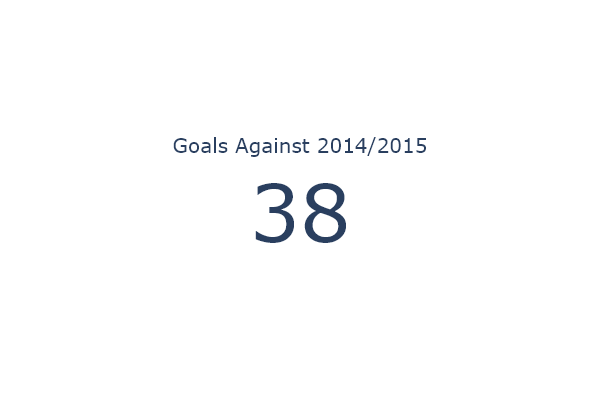

In [36]:
goals_against_14_15 = MC_14_15_goals_against.select("goals_against").collect()[0][0]
fig_goals_against_14_15 = go.Figure()
fig_goals_against_14_15.add_trace(go.Indicator(
    mode = "number",
    value = goals_against_14_15,
    title = {"text": "Goals Against 2014/2015", 'align': "center"},
    domain = {'x': [0, 1], 'y': [0, 1]}
    ))
fig_goals_against_14_15.update_layout(
    width=600,
    height=400,
)
fig_goals_against_14_15.show('png')

In this season the team has 83 goals for and 38 goals against.

Let's see now the general results of the team.

In [37]:
MC_14_15_results = MC_14_15_home_results.union(MC_14_15_away_results)
MC_14_15_results = MC_14_15_results.groupBy('home_team_id','result').sum().withColumnRenamed(
                    'sum(matches)', 'matches')
MC_14_15_results.show()

+------------+------+-------+
|home_team_id|result|matches|
+------------+------+-------+
|         167|   Won|     24|
|         167| Drawn|      7|
|         167|  Lost|      7|
+------------+------+-------+



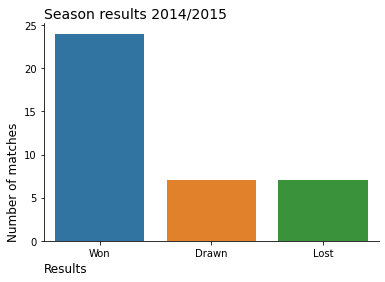

In [38]:
MC_14_15_results_plot = sns.barplot(x='result', y='matches', data=MC_14_15_results.toPandas())
MC_14_15_results_plot.set_ylabel('Number of matches', loc="bottom", fontsize=12)
MC_14_15_results_plot.set_xlabel('Results', loc="left", fontsize=12)
MC_14_15_results_plot.set_title('Season results 2014/2015', loc="left", fontsize=14)
sns.despine()

In this season the team has 83 Goals For and 38 Against.

To summarise, in this season the team Lost and Drew 7 matches, and Won 24.

The team has 83 Goals For and 38 Against, and the matches that the team lost most of them were just for 1 goal against.

### Season Stats<a class="anchor" id="stats1415"></a>

I will analise now the season taking some stats of the matches, and then compare them with all the teams.

I will take these stats:
- accurate_pass: Passes completed from one player to another (excluding throw-ins, keeper throws and crosses)
- ontarget_scoring_att: Shot on target
- total_scoring_att: Total shots
- fk_foul_lost: free kicks conceded to the opposition via fouls, handballs
- possession_percentage: The percentage of overall ball possession the given team had during the game
- total_pass: Total of all attempted (successful or unsuccessful) passes excluding throw-ins, keeper throws and crosses
- goals: Total Goals

In [39]:
#Collect all stats from away matches
season_stats_14_15_away = season_stats_14_15.select(
"away_team.aggregate_stats.possession_percentage",
"away_team.aggregate_stats.ontarget_scoring_att",
"away_team.aggregate_stats.total_scoring_att",
"away_team.aggregate_stats.fk_foul_lost",
"away_team.aggregate_stats.goals",
"away_team.aggregate_stats.total_pass",
"away_team.aggregate_stats.accurate_pass",
"away_team.team_details.team_id",
).withColumnRenamed('possession_percentage', 'possession')\
.withColumnRenamed('accurate_pass', 'acc_pass')\
.withColumnRenamed('total_pass', 'passes')

#Collect all stats from home matches
season_stats_14_15_home = season_stats_14_15.select(
"home_team.aggregate_stats.possession_percentage",
"home_team.aggregate_stats.ontarget_scoring_att",
"home_team.aggregate_stats.total_scoring_att",
"home_team.aggregate_stats.fk_foul_lost",
"home_team.aggregate_stats.goals",
"home_team.aggregate_stats.total_pass",
"home_team.aggregate_stats.accurate_pass",
"home_team.team_details.team_id",
).withColumnRenamed('possession_percentage', 'possession')\
.withColumnRenamed('accurate_pass', 'acc_pass')\
.withColumnRenamed('total_pass', 'passes')

#Merge both stats
season_stats_14_15_results = season_stats_14_15_home.union(season_stats_14_15_away)

#Calculate the average of the stats
season_stats_14_15_results = season_stats_14_15_results.withColumn('passes_precision', 
                                                                   (col('acc_pass') / col('passes')).cast(DecimalType(2,2)))\
.groupBy('team_id')\
.agg({"possession":"avg", "goals":"sum", "ontarget_scoring_att":"avg", "total_scoring_att":"avg", "passes":"avg", 
      "passes_precision":"avg", "fk_foul_lost":"avg"})\
.withColumnRenamed('avg(fk_foul_lost)', 'fouls')\
.withColumnRenamed('avg(passes)', 'passes')\
.withColumnRenamed('avg(ontarget_scoring_att)', 'target_shots')\
.withColumnRenamed('avg(total_scoring_att)', 'shots')\
.withColumnRenamed('avg(possession)', 'possession')\
.withColumnRenamed('avg(passes_precision)', 'passes_prec')\
.withColumnRenamed('sum(goals)', 'goals')

#I do a join to get the team nome
season_stats_14_15_results = season_stats_14_15_results.join(season_match_stats_14_15, 
                                                             season_match_stats_14_15.home_team_id == 
                                                             season_stats_14_15_results.team_id, "inner")\
.select('home_team_name', 'fouls', 'passes', 'shots', 'target_shots', 'possession', 'goals', 'passes_prec'
       ).withColumnRenamed('home_team_name', 'name').dropDuplicates()

In [40]:
season_stats_14_15_results_pd = season_stats_14_15_results.toPandas()

#### Possession<a class="anchor" id="possession1415"></a>

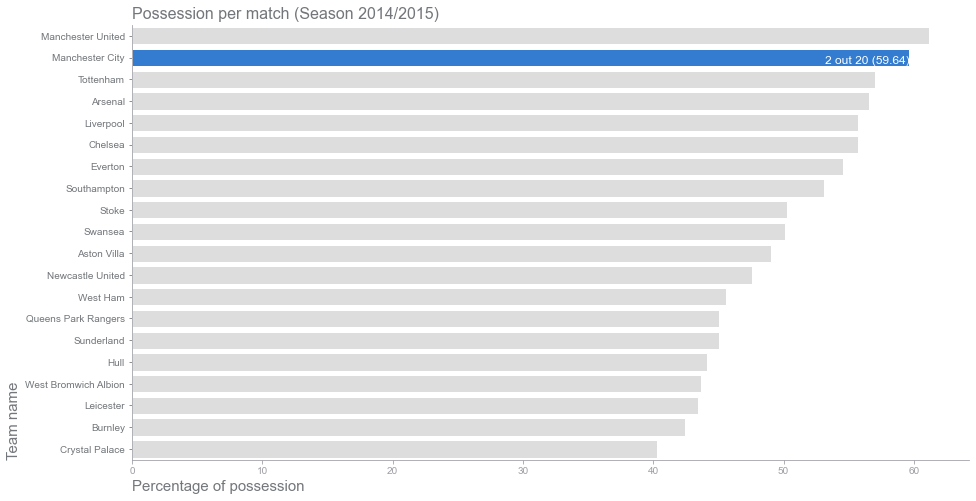

In [41]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
posession_plot = sns.barplot(y='name', x='possession', data=season_stats_14_15_results_pd.sort_values('possession', 
                                            ascending=False), orient="h")

for bar in posession_plot.patches:
    if bar.get_width() == 59.636842105263156:
        bar.set_facecolor('#337CCF')
        posession_plot.annotate(f'2 out 20 ({bar.get_width():.2f})', (bar.get_x() + bar.get_width(),
            bar.get_y() + bar.get_height()- 0.05), ha='right', va='center', fontsize=12, color='white',xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

posession_plot.set_title('Possession per match (Season 2014/2015)', fontsize = 16, loc="left", color='#73777B')
posession_plot.set_xlabel('Percentage of possession', fontsize = 15, loc="left",  color='#73777B')
posession_plot.tick_params(axis='x', colors='#9E9FA5')
posession_plot.tick_params(axis='y', colors='#73777B')
posession_plot.spines['bottom'].set_color('#9E9FA5')
posession_plot.spines['left'].set_color('#9E9FA5')
_ = posession_plot.set_ylabel('Team name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

Manchester United had a bit more of possession than Manchester City

#### Shots<a class="anchor" id="shots1415"></a>

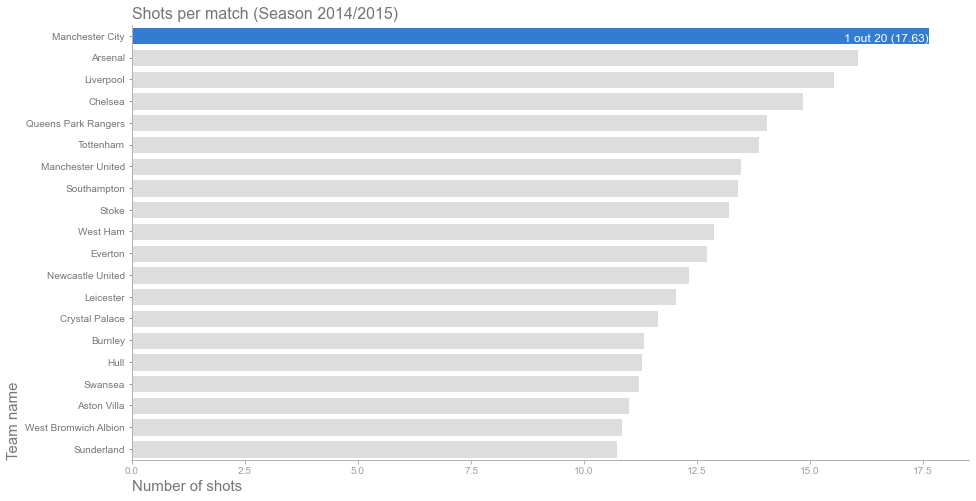

In [42]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
shots_plot = sns.barplot(y='name', x='shots', data=season_stats_14_15_results_pd.sort_values('shots', ascending=False), 
                             orient="h")

for bar in shots_plot.patches:
    if bar.get_width() == 17.63157894736842:
        bar.set_facecolor('#337CCF')
        shots_plot.annotate(f'1 out 20 ({bar.get_width():.2f})', (bar.get_x() + bar.get_width(),
            bar.get_y() + bar.get_height()- 0.05), ha='right', va='center', fontsize=12, color='white',xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

shots_plot.set_title('Shots per match (Season 2014/2015)', fontsize = 16, loc="left", color='#73777B')
shots_plot.set_xlabel('Number of shots', fontsize = 15, loc="left",  color='#73777B')
shots_plot.tick_params(axis='x', colors='#9E9FA5')
shots_plot.tick_params(axis='y', colors='#73777B')
shots_plot.spines['bottom'].set_color('#9E9FA5')
shots_plot.spines['left'].set_color('#9E9FA5')
_ = shots_plot.set_ylabel('Team name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

Manchester City was the team with most number of shots in the season.

#### Shots in the target<a class="anchor" id="shotsTarget1415"></a>

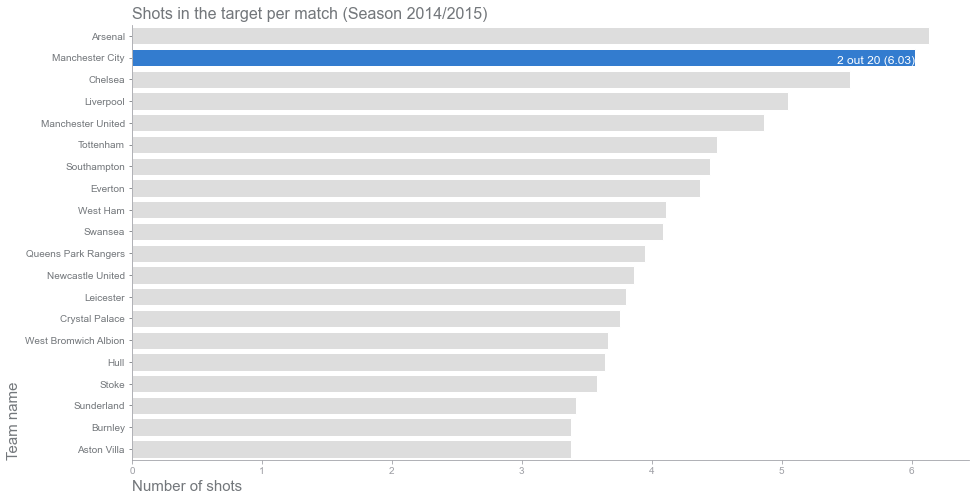

In [43]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
target_shots_plot = sns.barplot(y='name', x='target_shots', data=season_stats_14_15_results_pd.sort_values('target_shots', 
                                                            ascending=False), orient="h")

for bar in target_shots_plot.patches:
    if bar.get_width() == 6.026315789473684:
        bar.set_facecolor('#337CCF')
        target_shots_plot.annotate(f'2 out 20 ({bar.get_width():.2f})', (bar.get_x() + bar.get_width(),
            bar.get_y() + bar.get_height()- 0.05), ha='right', va='center', fontsize=12, color='white',xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

target_shots_plot.set_title('Shots in the target per match (Season 2014/2015)', fontsize = 16, loc="left", color='#73777B')
target_shots_plot.set_xlabel('Number of shots', fontsize = 15, loc="left",  color='#73777B')
target_shots_plot.tick_params(axis='x', colors='#9E9FA5')
target_shots_plot.tick_params(axis='y', colors='#73777B')
target_shots_plot.spines['bottom'].set_color('#9E9FA5')
target_shots_plot.spines['left'].set_color('#9E9FA5')
_ = target_shots_plot.set_ylabel('Team name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

Here we can see that Manchester City is the team with most shots and 6 shots on target per match. But Arsenal had more shots on target with less shots, so Arsenal was a little more accurate.

#### Passes precision<a class="anchor" id="passessPre1415"></a>

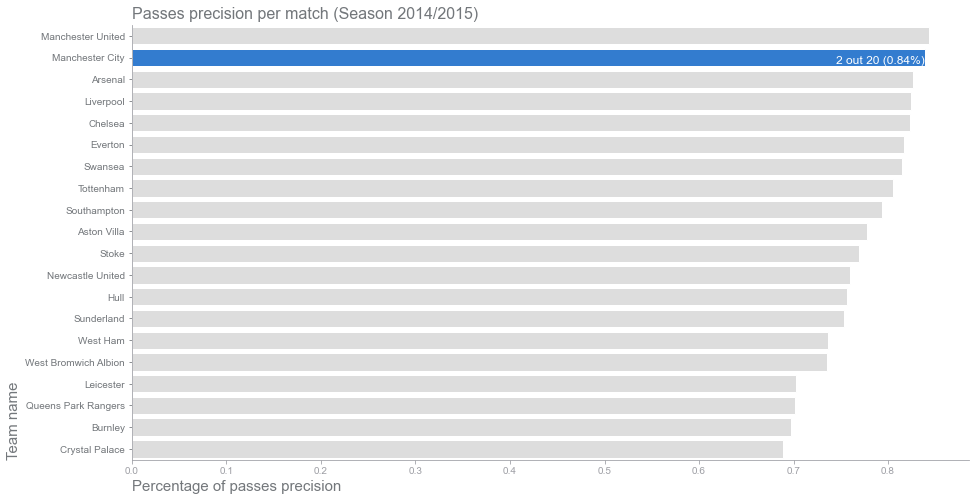

In [44]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
passes_prec_plot = sns.barplot(y='name', x='passes_prec', data=season_stats_14_15_results_pd.sort_values('passes_prec', 
                                                            ascending=False), orient="h")

for bar in passes_prec_plot.patches:     
    if bar.get_width() == 0.838684:
        bar.set_facecolor('#337CCF')
        passes_prec_plot.annotate(f'2 out 20 ({bar.get_width():.2f}%)', (bar.get_x() + bar.get_width(),
            bar.get_y() + bar.get_height()- 0.05), ha='right', va='center', fontsize=12, color='white',xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

passes_prec_plot.set_title('Passes precision per match (Season 2014/2015)', fontsize = 16, loc="left", color='#73777B')
passes_prec_plot.set_xlabel('Percentage of passes precision', fontsize = 15, loc="left",  color='#73777B')
passes_prec_plot.tick_params(axis='x', colors='#9E9FA5')
passes_prec_plot.tick_params(axis='y', colors='#73777B')
passes_prec_plot.spines['bottom'].set_color('#9E9FA5')
passes_prec_plot.spines['left'].set_color('#9E9FA5')
_ = passes_prec_plot.set_ylabel('Team name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

Here also the Manchester United is the team with most passes precision.

#### Fouls<a class="anchor" id="fouls1415"></a>

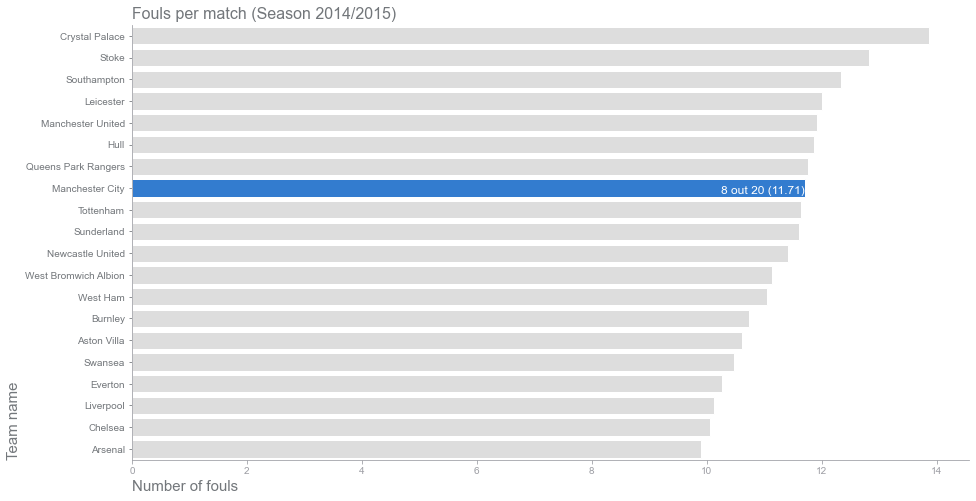

In [45]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
fouls_plot = sns.barplot(y='name', x='fouls', data=season_stats_14_15_results_pd.sort_values('fouls', 
                                                            ascending=False), orient="h")

for bar in fouls_plot.patches:
    if bar.get_width() == 11.710526315789474:
        bar.set_facecolor('#337CCF')
        fouls_plot.annotate(f'8 out 20 ({bar.get_width():.2f})', (bar.get_x() + bar.get_width(),
            bar.get_y() + bar.get_height()- 0.05), ha='right', va='center', fontsize=12, color='white',xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

fouls_plot.set_title('Fouls per match (Season 2014/2015)', fontsize = 16, loc="left", color='#73777B')
fouls_plot.set_xlabel('Number of fouls', fontsize = 15, loc="left",  color='#73777B')
fouls_plot.tick_params(axis='x', colors='#9E9FA5')
fouls_plot.tick_params(axis='y', colors='#73777B')
fouls_plot.spines['bottom'].set_color('#9E9FA5')
fouls_plot.spines['left'].set_color('#9E9FA5')
_ = fouls_plot.set_ylabel('Team name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

Here we can see that Manchester City committed fouls over the median.

#### Passes<a nemae="passes1415"></a>

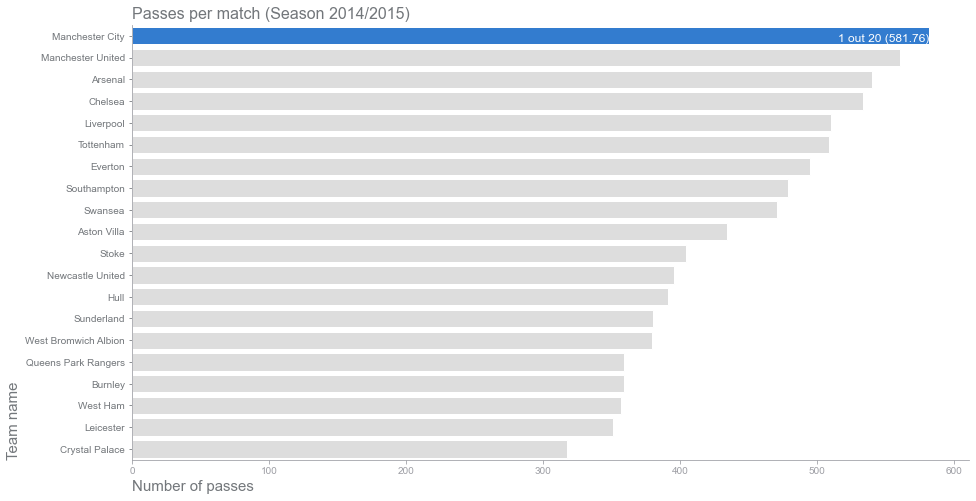

In [46]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
passes_plot = sns.barplot(y='name', x='passes', data=season_stats_14_15_results_pd.sort_values('passes', 
                                                            ascending=False), orient="h")

for bar in passes_plot.patches:
    if bar.get_width() == 581.7631578947369:
        bar.set_facecolor('#337CCF')
        passes_plot.annotate(f'1 out 20 ({bar.get_width():.2f})', (bar.get_x() + bar.get_width(),
            bar.get_y() + bar.get_height()- 0.05), ha='right', va='center', fontsize=12, color='white',xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

passes_plot.set_title('Passes per match (Season 2014/2015)', fontsize = 16, loc="left", color='#73777B')
passes_plot.set_xlabel('Number of passes', fontsize = 15, loc="left",  color='#73777B')
passes_plot.tick_params(axis='x', colors='#9E9FA5')
passes_plot.tick_params(axis='y', colors='#73777B')
passes_plot.spines['bottom'].set_color('#9E9FA5')
passes_plot.spines['left'].set_color('#9E9FA5')
_ = passes_plot.set_ylabel('Team name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

Manchester City is the team with most passes per match.

### Goals<a class="anchor" id="goals1415"></a>

Let's see now all the goals for and against of each team.

In [47]:
#I cast the scores to allow their sum
season_match_stats_14_15 = season_match_stats_14_15.withColumn("half_time_score_home_team", 
                                                season_match_stats_14_15["half_time_score_home_team"].cast(IntegerType()))
season_match_stats_14_15 = season_match_stats_14_15.withColumn("half_time_score_away_team",
                                                season_match_stats_14_15["half_time_score_away_team"].cast(IntegerType()))
season_match_stats_14_15 = season_match_stats_14_15.withColumn("full_time_score_home_team",
                                                season_match_stats_14_15["full_time_score_home_team"].cast(IntegerType()))
season_match_stats_14_15 = season_match_stats_14_15.withColumn("full_time_score_away_team",
                                                season_match_stats_14_15["full_time_score_away_team"].cast(IntegerType()))

#I get the goals for done in home
season_match_stats_14_15_goals_for_home = season_match_stats_14_15.groupBy('home_team_name').sum('full_time_score_home_team'
              ).withColumnRenamed('sum(full_time_score_home_team)', 'goals_for').withColumnRenamed('home_team_name', 'team')

#I get the goals for done away
season_match_stats_14_15_goals_for_away = season_match_stats_14_15.groupBy('away_team_name').sum('full_time_score_away_team'
             ).withColumnRenamed('sum(full_time_score_away_team)', 'goals_for').withColumnRenamed('away_team_name', 'team')

#I sum both home and away goal
season_match_stats_14_15_goals_for = season_match_stats_14_15_goals_for_home.union(season_match_stats_14_15_goals_for_away
                                       ).groupBy('team').sum('goals_for').withColumnRenamed('sum(goals_for)', 'goals_for')

In [48]:
#I get the goals against done in home
season_match_stats_14_15_goals_against_home = season_match_stats_14_15.groupBy('home_team_name').sum(
    'full_time_score_away_team').withColumnRenamed('sum(full_time_score_away_team)', 'goals_against'
                                                  ).withColumnRenamed('home_team_name', 'team')

#I get the goals against done away
season_match_stats_14_15_goals_against_away = season_match_stats_14_15.groupBy('away_team_name').sum(
    'full_time_score_home_team').withColumnRenamed('sum(full_time_score_home_team)', 'goals_against'
                                                  ).withColumnRenamed('away_team_name', 'team')

# I sum both home and away goals against
season_match_stats_14_15_goals_against = season_match_stats_14_15_goals_against_home.union(
    season_match_stats_14_15_goals_against_away).groupBy('team').sum('goals_against'
                        ).withColumnRenamed('sum(goals_against)', 'goals_against')

season_match_stats_14_15_goals_against = season_match_stats_14_15_goals_against.withColumnRenamed('team', 'team2')

#I join both goals, for and against into the same table
season_match_stats_14_15_goals = season_match_stats_14_15_goals_against.join(season_match_stats_14_15_goals_for, 
                            season_match_stats_14_15_goals_for.team==season_match_stats_14_15_goals_against.team2,"inner")

# I order by goals for
season_match_stats_14_15_goals_pd = season_match_stats_14_15_goals.orderBy("goals_for", ascending=False).toPandas()
season_match_stats_14_15_goals_pd = season_match_stats_14_15_goals_pd.drop('team2', axis=1)

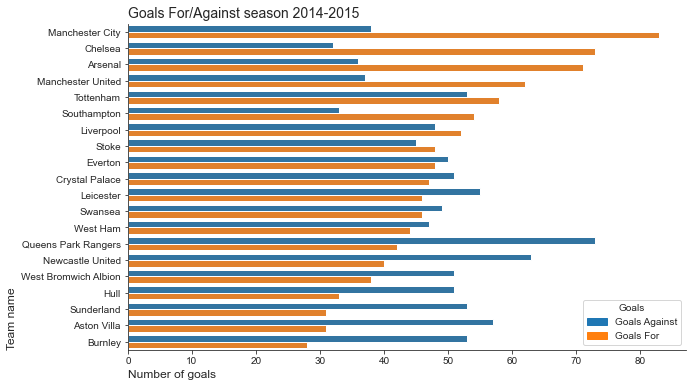

In [49]:
df_melted = pd.melt(season_match_stats_14_15_goals_pd, id_vars='team', var_name='Goals', value_name='Count')
plt.figure(figsize=(10, 6))
goals_1415_plot = sns.barplot(y='team', x='Count', hue='Goals', data=df_melted, orient='h')
goals_1415_plot.set_ylabel('Team name', fontsize=12, loc="bottom")
goals_1415_plot.set_xlabel('Number of goals', fontsize=12, loc="left")
goals_1415_plot.set_title('Goals For/Against season 2014-2015', fontsize=14, loc="left")

palette = sns.color_palette(n_colors=len(df_melted['Goals'].unique()))
custom_legend = {'Goals Against':palette[0], 'Goals For':palette[1]}
handles = [plt.Rectangle((0,0), 1, 1, color=color) for color in custom_legend.values()]
legend = plt.legend(handles, custom_legend.keys(), title='Goals')
sns.despine()

We can see that Manchester City is the team with more **goals for**, and one of the teams with less goals against.

### Summary Season 2014/2015<a class="anchor" id="summary1415"></a>

Here we can see that Manchester City is the team with more Goals For, and obviously Chesea has less Goals Against.

To summarise, comparing Manchester City with the champion of this seasom, this has less passes but similar precision.

Manchester City is the team with more shots, possession, passes, and goals for.

On the other hand, Manchester City has more fouls than Chelsea, let's remember that the matches that the team lost were for one goal against, and this could be due to a foul.

-----------------------------

## Season 2015/2016<a class="anchor" id="season1516"></a>

In [50]:
sqlContext.sql('DROP TABLE IF EXISTS season_match_stats_15_16')
sqlContext.registerDataFrameAsTable(season_match_stats_15_16,'season_match_stats_15_16')

In [51]:
MC_15_16 = season_match_stats_15_16.where("home_team_id == '167' OR away_team_id == '167'")
MC_15_16.count()

38

We have the results of this season of team.

In [52]:
#I create a new column to set the result of the match (Won, Lost, Drawn)
MC_15_16 = MC_15_16.withColumn('result', 
      when(((MC_15_16.home_team_id == '167') & (MC_15_16.full_time_score_home_team.cast('float') > 
                                                MC_15_16.full_time_score_away_team.cast('float'))), lit("Won"))
      .when(((MC_15_16.home_team_id == '167') & (MC_15_16.full_time_score_home_team.cast('float') < 
                                                 MC_15_16.full_time_score_away_team.cast('float'))), lit("Lost"))
      .when(((MC_15_16.away_team_id == '167') & (MC_15_16.full_time_score_away_team.cast('float') > 
                                                 MC_15_16.full_time_score_home_team.cast('float'))), lit("Won"))
      .when(((MC_15_16.away_team_id == '167') & (MC_15_16.full_time_score_away_team.cast('float') < 
                                                 MC_15_16.full_time_score_home_team.cast('float'))), lit("Lost"))
      .otherwise(lit("Drawn")))

### Away Matches<a class="anchor" id="awayMatches1516"></a>

Let's start by analyzing the away matches of this season.

In [53]:
MC_15_16_away_results = MC_15_16.select("away_team_id","result")\
    .where("away_team_id == '167'")\
    .groupBy('away_team_id',"result")\
    .count()\
    .withColumnRenamed('count', 'matches')
MC_15_16_away_results.show()

+------------+------+-------+
|away_team_id|result|matches|
+------------+------+-------+
|         167|   Won|      7|
|         167| Drawn|      7|
|         167|  Lost|      5|
+------------+------+-------+



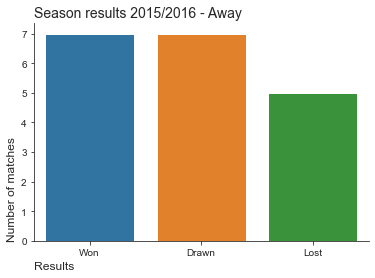

In [54]:
MC_15_16_home_results_PD = MC_15_16.where("away_team_id == '167'").toPandas()
MC_15_16_home_results_plot = sns.countplot(data=MC_15_16_home_results_PD, x="result")
MC_15_16_home_results_plot.set_ylabel('Number of matches', loc="bottom", fontsize=12)
MC_15_16_home_results_plot.set_xlabel('Results', loc="left", fontsize=12)
MC_15_16_home_results_plot.set_title('Season results 2015/2016 - Away', loc="left", fontsize=14)
sns.despine()

In this season, the team has drawn 3 away matches more than in the previous season. Also, the team lost the same number of matches. Then, in this season the team lost more points than the previous one.

Les's explore the matches that the team lost.

In [55]:
#I cast the scores to interger in order to allow to compare them
MC_15_16 = MC_15_16.withColumn("half_time_score_home_team",MC_15_16["half_time_score_home_team"].cast(IntegerType()))
MC_15_16 = MC_15_16.withColumn("half_time_score_away_team",MC_15_16["half_time_score_away_team"].cast(IntegerType()))
MC_15_16 = MC_15_16.withColumn("full_time_score_home_team",MC_15_16["full_time_score_home_team"].cast(IntegerType()))
MC_15_16 = MC_15_16.withColumn("full_time_score_away_team",MC_15_16["full_time_score_away_team"].cast(IntegerType()))
MC_15_16 = MC_15_16.withColumn("date_string", to_date(col("date_string"),'dd/MM/yyyy HH:mm:ss'))

In [56]:
#I get the scores of the matches away that Manchester City lost
MC_15_16.select("full_time_score_home_team","full_time_score_away_team")\
.withColumnRenamed('full_time_score_home_team', 'Final Score Home team')\
.withColumnRenamed('full_time_score_away_team', 'Final Score Manchester City')\
.where("away_team_id == '167' AND result == 'Lost'").show() 

+---------------------+---------------------------+
|Final Score Home team|Final Score Manchester City|
+---------------------+---------------------------+
|                    2|                          0|
|                    2|                          1|
|                    4|                          2|
|                    4|                          1|
|                    3|                          0|
+---------------------+---------------------------+



In [57]:
#I get the matches that Manchester City lost where they ended the first half lossing
MC_15_16.select("half_time_score_home_team", "half_time_score_away_team", "full_time_score_home_team",
                  "full_time_score_away_team", 'home_team_name').where(
                "away_team_id == '167' AND result == 'Lost' AND half_time_score_home_team > half_time_score_away_team")\
                .withColumnRenamed('half_time_score_home_team', 'Half Time Score Home Team')\
                .withColumnRenamed('half_time_score_away_team', 'Half Time Score Manchester City')\
                .withColumnRenamed('full_time_score_home_team', 'Final Score Home Team')\
                .withColumnRenamed('full_time_score_away_team', 'Final Score Manchester City')\
                .withColumnRenamed('home_team_name', 'Home Name').show() 

+-------------------------+-------------------------------+---------------------+---------------------------+-----------+
|Half Time Score Home Team|Half Time Score Manchester City|Final Score Home Team|Final Score Manchester City|  Home Name|
+-------------------------+-------------------------------+---------------------+---------------------------+-----------+
|                        2|                              0|                    2|                          0|      Stoke|
|                        2|                              0|                    2|                          1|    Arsenal|
|                        2|                              1|                    4|                          2|Southampton|
|                        2|                              0|                    3|                          0|  Liverpool|
+-------------------------+-------------------------------+---------------------+---------------------------+-----------+



As we can see, the team has lost against diffent teams than the previous season. Also, they lost the matches for 2 or more goals against, a big difference than the last season, where the matches that the team lost were by one goal against.

Both seasons have in common that team ended the first half losing the match. The team was not able to revert the result.

What about the draw matches?

In [58]:
#I get the drawn matches
MC_15_16.select("half_time_score_home_team", "half_time_score_away_team", "full_time_score_home_team",
                  'home_team_name').where("away_team_id == '167' AND result == 'Drawn'")\
                .withColumnRenamed('half_time_score_home_team', 'Half Time Score Away Team')\
                .withColumnRenamed('half_time_score_away_team', 'Half Time Score MC')\
                .withColumnRenamed('full_time_score_home_team', 'Final Score')\
                .withColumnRenamed('home_team_name', 'Home Team').show() 

+-------------------------+------------------+-----------+-----------------+
|Half Time Score Away Team|Half Time Score MC|Final Score|        Home Team|
+-------------------------+------------------+-----------+-----------------+
|                        1|                 1|          1|          Swansea|
|                        1|                 1|          2|         West Ham|
|                        0|                 0|          0|        Leicester|
|                        0|                 0|          0|      Aston Villa|
|                        0|                 0|          0|Manchester United|
|                        0|                 0|          0|          Norwich|
|                        1|                 1|          1| Newcastle United|
+-------------------------+------------------+-----------+-----------------+



Most of the matches that the team lost were without goals.

### Home Matches<a class="anchor" id="homeMatches1516"></a>

Let's see now the team's performance in home.

In [59]:
MC_15_16_home_results =  MC_15_16.select("home_team_id","result").where("home_team_id == '167'"
                                                                       ).groupBy('home_team_id',"result").count() 
MC_15_16_home_results = MC_15_16_home_results.withColumnRenamed('count', 'matches')
MC_15_16_home_results.show()

+------------+------+-------+
|home_team_id|result|matches|
+------------+------+-------+
|         167|   Won|     12|
|         167| Drawn|      2|
|         167|  Lost|      5|
+------------+------+-------+



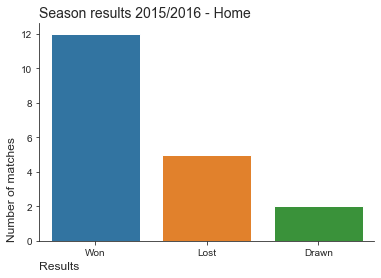

In [61]:
MC_15_16_home_results_PD = MC_15_16.where("home_team_id == '167'").toPandas()
MC_15_16_home_results_plot = sns.countplot(data=MC_15_16_home_results_PD, x="result")
MC_15_16_home_results_plot.set_ylabel('Number of matches', loc="bottom", fontsize=12)
MC_15_16_home_results_plot.set_xlabel('Results', loc="left", fontsize=12)
MC_15_16_home_results_plot.set_title('Season results 2015/2016 - Home', loc="left", fontsize=14)
sns.despine()

In home, the team has lost more matches than in the previous season. Let's see more details.

In [62]:
MC_15_16.select("half_time_score_home_team","half_time_score_away_team","full_time_score_home_team",
                  "full_time_score_away_team",'away_team_name')\
                .where("home_team_id == '167' AND result == 'Lost'")\
                .withColumnRenamed('half_time_score_home_team', 'Half Time Score Manchester City')\
                .withColumnRenamed('half_time_score_away_team', 'Half Time Score Away Team')\
                .withColumnRenamed('full_time_score_home_team', 'Final Score Manchester City')\
                .withColumnRenamed('full_time_score_away_team', 'Final Score Away Team')\
                .withColumnRenamed('away_team_name', 'Away Team').show() 

+-------------------------------+-------------------------+---------------------------+---------------------+-----------------+
|Half Time Score Manchester City|Half Time Score Away Team|Final Score Manchester City|Final Score Away Team|        Away Team|
+-------------------------------+-------------------------+---------------------------+---------------------+-----------------+
|                              0|                        1|                          1|                    3|        Leicester|
|                              1|                        3|                          1|                    4|        Liverpool|
|                              0|                        0|                          1|                    2|        Tottenham|
|                              1|                        2|                          1|                    2|         West Ham|
|                              0|                        1|                          0|                 

In home also, the lost matches were for more than one goal against.

### Goals and general results<a class="anchor" id="goalsResults1516"></a>

Let's see now the goals for and against of the team in the season

In [62]:
#I get the goals for done in home
MC_15_16_goals_for_home = MC_15_16.groupBy('home_team_id').sum('full_time_score_home_team').where(
    "home_team_id == '167'").withColumnRenamed('sum(full_time_score_home_team)', 'goals_for'
                                              ).withColumnRenamed('home_team_id', 'team')

#I get the goals for done away
MC_15_16_goals_for_away = MC_15_16.groupBy('away_team_id').sum('full_time_score_away_team').where(
    "away_team_id == '167'").withColumnRenamed('sum(full_time_score_away_team)', 'goals_for'
                                              ).withColumnRenamed('away_team_id', 'team')
#Get all goals for
MC_15_16_goals_for = MC_15_16_goals_for_home.union(MC_15_16_goals_for_away).groupBy('team').sum('goals_for'
                                                ).withColumnRenamed('sum(goals_for)', 'goals_for')

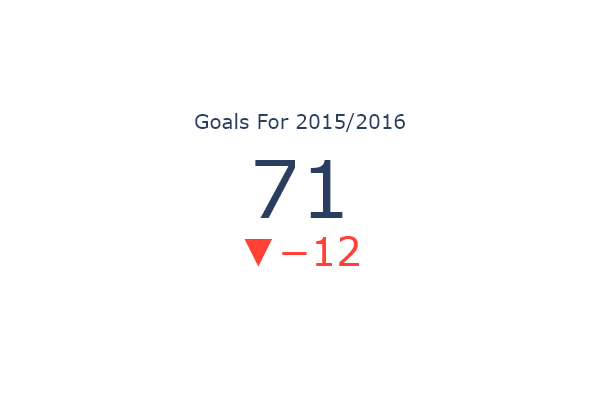

In [63]:
goals_for_15_16 = MC_15_16_goals_for.select("goals_for").collect()[0][0]
fig_goals_for_15_16 = go.Figure()
fig_goals_for_15_16.add_trace(go.Indicator(
    mode = "number+delta",
    delta = {'position': "bottom", 'reference': goals_for_14_15},
    value = goals_for_15_16,
    title = {"text": "Goals For 2015/2016", 'align': "center", },
    domain = {'x': [0, 1], 'y': [0, 1]}
    ))
fig_goals_for_15_16.update_layout(width=600, height=400)
fig_goals_for_15_16.show('png')

In [65]:
#I get the goals against done in home
MC_15_16_goals_against_home = MC_15_16.groupBy('home_team_id').sum('full_time_score_away_team').where(
    "home_team_id == '167'").withColumnRenamed('sum(full_time_score_away_team)', 'goals_against'
                                              ).withColumnRenamed('home_team_id', 'team')
#I get the goals against done away
MC_15_16_goals_against_away = MC_15_16.groupBy('away_team_id').sum('full_time_score_home_team').where(
    "away_team_id == '167'").withColumnRenamed('sum(full_time_score_home_team)', 'goals_against'
                                              ).withColumnRenamed('away_team_id', 'team')

#I get all goals against by union both home and away
MC_15_16_goals_against = MC_15_16_goals_against_home.union(MC_15_16_goals_against_away).groupBy('team').sum('goals_against'
                                            ).withColumnRenamed('sum(goals_against)', 'goals_against')

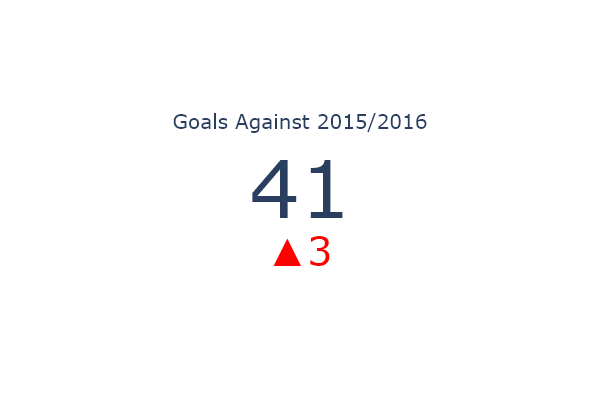

In [70]:
goals_against_15_16 = MC_15_16_goals_against.select("goals_against").collect()[0][0]
fig_goals_against_15_16 = go.Figure()
fig_goals_against_15_16.add_trace(go.Indicator(
    mode = "number+delta",
    delta = {'position': "bottom", 'reference': goals_against_14_15, "increasing": {"color": 'red', "symbol": '▲'}, 
             "decreasing": {"color": 'green', "symbol": '▼'}},
    value = goals_against_15_16,
    title = {"text": "Goals Against 2015/2016", 'align': "center"},
    domain = {'x': [0, 1], 'y': [0, 1]}
    ))
fig_goals_against_15_16.update_layout(width=600, height=400)
fig_goals_against_15_16.show('png')

Let's summarise the results.

In [71]:
MC_15_16_results = MC_15_16_home_results.union(MC_15_16_away_results)
MC_15_16_results = MC_15_16_results.groupBy('home_team_id','result')\
                    .sum().withColumnRenamed('sum(matches)', 'matches')
MC_15_16_results.show()

+------------+------+-------+
|home_team_id|result|matches|
+------------+------+-------+
|         167|   Won|     19|
|         167| Drawn|      9|
|         167|  Lost|     10|
+------------+------+-------+



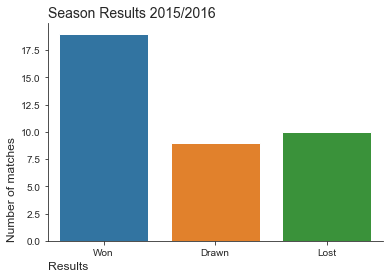

In [72]:
MC_15_16_results_plot = sns.barplot(x='result', y='matches', data=MC_15_16_results.toPandas())
MC_15_16_results_plot.set_ylabel('Number of matches', loc="bottom", fontsize=12)
MC_15_16_results_plot.set_xlabel('Results', loc="left", fontsize=12)
MC_15_16_results_plot.set_title('Season Results 2015/2016', loc="left", fontsize=14)
sns.despine()

To summarise, in this season, the team had 71 goals for and 41 goals against. Regarding the last season, in this one they had less goals for and more against goals. In the season the team finished in the 4th place.

### Season Stats<a class="anchor" id="stats1516"></a>

In [73]:
#Collect all stats from away matches
season_stats_15_16_away = season_stats_15_16.select(
"away_team.aggregate_stats.possession_percentage",
"away_team.aggregate_stats.ontarget_scoring_att",
"away_team.aggregate_stats.total_scoring_att",
"away_team.aggregate_stats.fk_foul_lost",
"away_team.aggregate_stats.goals",
"away_team.aggregate_stats.total_pass",
"away_team.aggregate_stats.accurate_pass",
"away_team.team_details.team_id",
).withColumnRenamed('possession_percentage', 'possession')\
.withColumnRenamed('accurate_pass', 'acc_pass')\
.withColumnRenamed('total_pass', 'passes')

#Collect all stats from home matches
season_stats_15_16_home = season_stats_15_16.select(
"home_team.aggregate_stats.possession_percentage",
"home_team.aggregate_stats.ontarget_scoring_att",
"home_team.aggregate_stats.total_scoring_att",
"home_team.aggregate_stats.fk_foul_lost",
"home_team.aggregate_stats.goals",
"home_team.aggregate_stats.total_pass",
"home_team.aggregate_stats.accurate_pass",
"home_team.team_details.team_id",
).withColumnRenamed('possession_percentage', 'possession')\
.withColumnRenamed('accurate_pass', 'acc_pass')\
.withColumnRenamed('total_pass', 'passes')

#Merge both stats
season_stats_15_16_results = season_stats_15_16_home.union(season_stats_15_16_away)

#Calculate the average of the stats
season_stats_15_16_results = season_stats_15_16_results.withColumn('passes_precision', (col('acc_pass') / col('passes')
                                                                                       ).cast(DecimalType(2,2)))\
.groupBy('team_id')\
.agg({"possession":"avg", "goals":"sum", "ontarget_scoring_att":"avg", "total_scoring_att":"avg", "passes":"avg", 
      "passes_precision":"avg", "fk_foul_lost":"avg"})\
.withColumnRenamed('avg(fk_foul_lost)', 'fouls')\
.withColumnRenamed('avg(passes)', 'passes')\
.withColumnRenamed('avg(ontarget_scoring_att)', 'target_shots')\
.withColumnRenamed('avg(total_scoring_att)', 'shots')\
.withColumnRenamed('avg(possession)', 'possession')\
.withColumnRenamed('avg(passes_precision)', 'passes_prec')\
.withColumnRenamed('sum(goals)', 'goals')

#I do a join to get the team nome
season_stats_15_16_results = season_stats_15_16_results.join(season_match_stats_15_16, 
                             season_match_stats_15_16.home_team_id==season_stats_15_16_results.team_id, "inner")\
.select('home_team_name', 'fouls', 'passes', 'target_shots', 'shots', 'possession', 'goals', 'passes_prec').withColumnRenamed(
                          'home_team_name', 'name').dropDuplicates()

In [74]:
season_stats_15_16_results_pd = season_stats_15_16_results.toPandas()

#### Possession<a class="anchor" id="possession1516"></a>

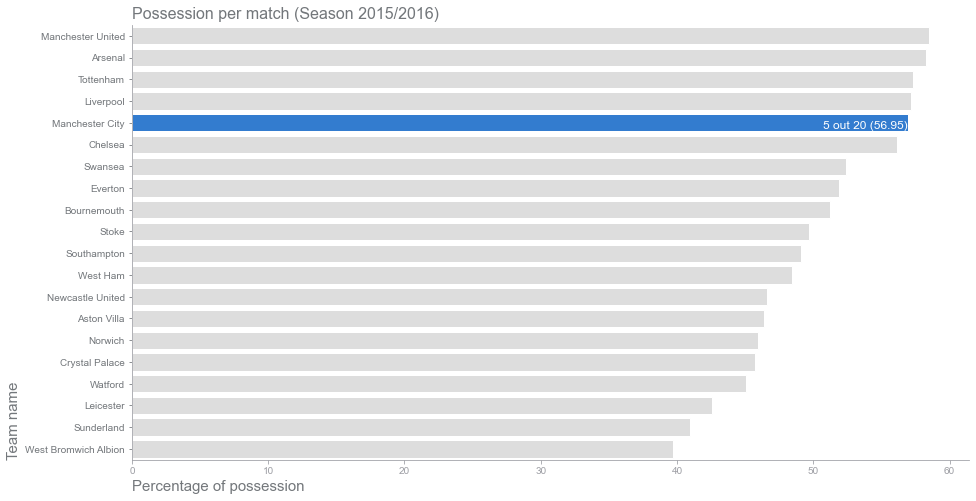

In [75]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
posession_plot = sns.barplot(y='name', x='possession', data=season_stats_15_16_results_pd.sort_values('possession', 
                                                                        ascending=False), orient="h")

for bar in posession_plot.patches:
    if bar.get_width() == 56.94999999999999:
        bar.set_facecolor('#337CCF')
        posession_plot.annotate(f'5 out 20 ({bar.get_width():.2f})', (bar.get_x() + bar.get_width(),
            bar.get_y() + bar.get_height()- 0.05), ha='right', va='center', fontsize=12, color='white',xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

posession_plot.set_title('Possession per match (Season 2015/2016)', fontsize = 16, loc="left", color='#73777B')
posession_plot.set_xlabel('Percentage of possession', fontsize = 15, loc="left",  color='#73777B')
posession_plot.tick_params(axis='x', colors='#9E9FA5')
posession_plot.tick_params(axis='y', colors='#73777B')
posession_plot.spines['bottom'].set_color('#9E9FA5')
posession_plot.spines['left'].set_color('#9E9FA5')
_ = posession_plot.set_ylabel('Team name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

In this season the team had less possession than in the previous one. On the other hand, the champion (Leicester) is one of the team with the worst possession.

#### Shots<a class="anchor" id="shots1516"></a>

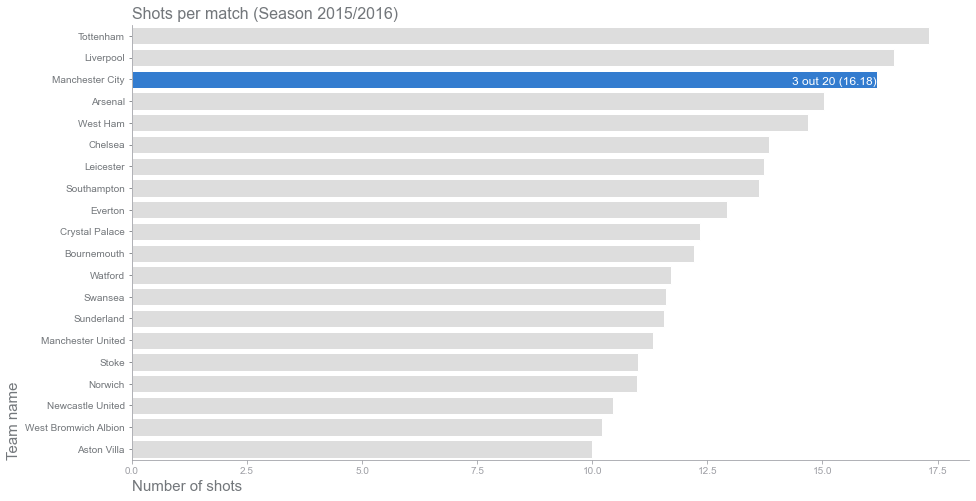

In [76]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
shots_plot = sns.barplot(y='name', x='shots', data=season_stats_15_16_results_pd.sort_values('shots', ascending=False), 
                             orient="h")

for bar in shots_plot.patches:
    if bar.get_width() == 16.18421052631579:
        bar.set_facecolor('#337CCF')
        shots_plot.annotate(f'3 out 20 ({bar.get_width():.2f})', (bar.get_x() + bar.get_width(),
            bar.get_y() + bar.get_height()- 0.05), ha='right', va='center', fontsize=12, color='white',xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

shots_plot.set_title('Shots per match (Season 2015/2016)', fontsize = 16, loc="left", color='#73777B')
shots_plot.set_xlabel('Number of shots', fontsize = 15, loc="left",  color='#73777B')
shots_plot.tick_params(axis='x', colors='#9E9FA5')
shots_plot.tick_params(axis='y', colors='#73777B')
shots_plot.spines['bottom'].set_color('#9E9FA5')
shots_plot.spines['left'].set_color('#9E9FA5')
_ = shots_plot.set_ylabel('Team name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

The team had lees shots, and was overcome by Liverpool and Tottenham.

#### Shots in the target<a class="anchor" id="shotsTarget1516"></a>

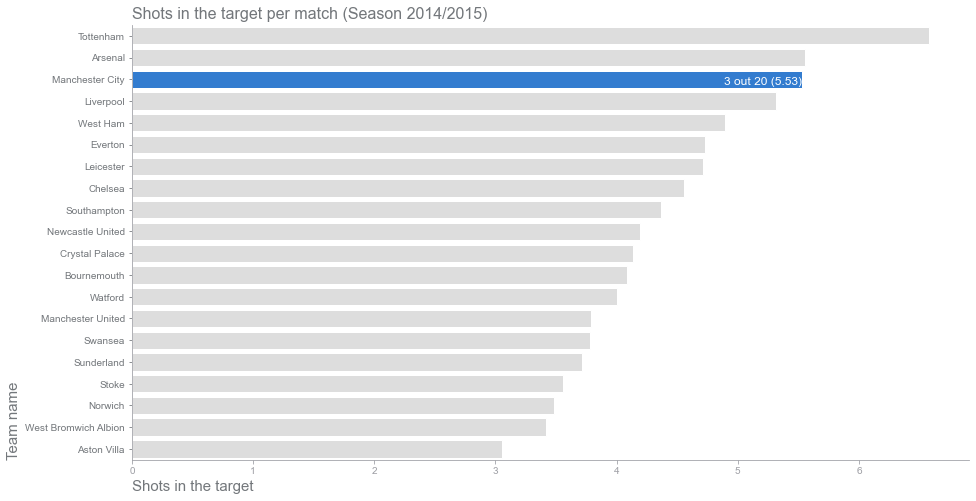

In [77]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
target_shots_plot = sns.barplot(y='name', x='target_shots', data=season_stats_15_16_results_pd.sort_values('target_shots', 
                                                            ascending=False), orient="h")

for bar in target_shots_plot.patches:
    if bar.get_width() == 5.526315789473684:
        bar.set_facecolor('#337CCF')
        target_shots_plot.annotate(f'3 out 20 ({bar.get_width():.2f})', (bar.get_x() + bar.get_width(),
            bar.get_y() + bar.get_height()- 0.05), ha='right', va='center', fontsize=12, color='white',xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

target_shots_plot.set_title('Shots in the target per match (Season 2014/2015)', fontsize = 16, loc="left", color='#73777B')
target_shots_plot.set_xlabel('Shots in the target', fontsize = 15, loc="left",  color='#73777B')
target_shots_plot.tick_params(axis='x', colors='#9E9FA5')
target_shots_plot.tick_params(axis='y', colors='#73777B')
target_shots_plot.spines['bottom'].set_color('#9E9FA5')
target_shots_plot.spines['left'].set_color('#9E9FA5')
_ = target_shots_plot.set_ylabel('Team name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

In shots in the target, the team also was overcome by Liverpool and Tottenham.

#### Passes precision<a class="anchor" id="passessPre1516"></a>

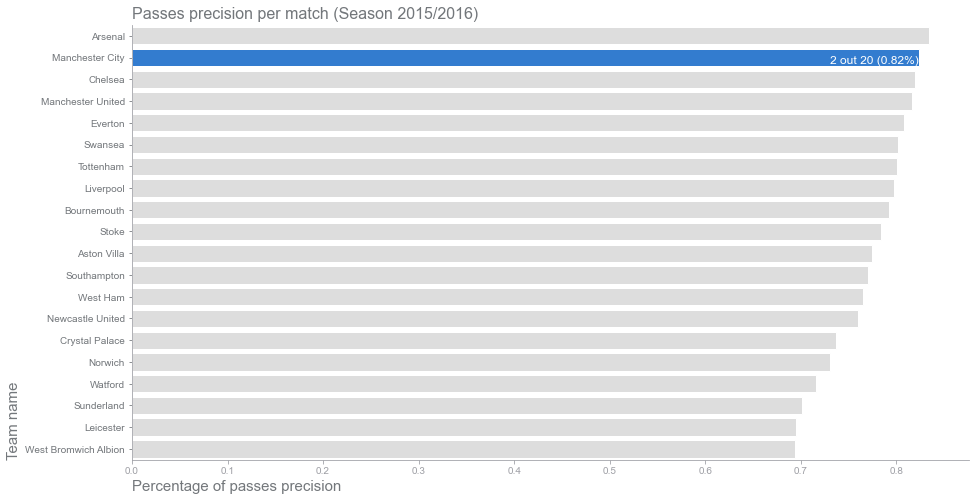

In [78]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
passes_prec_plot = sns.barplot(y='name', x='passes_prec', data=season_stats_15_16_results_pd.sort_values('passes_prec', 
                                                            ascending=False), orient="h")

for bar in passes_prec_plot.patches:     
    if bar.get_width() == 0.823684:
        bar.set_facecolor('#337CCF')
        passes_prec_plot.annotate(f'2 out 20 ({bar.get_width():.2f}%)', (bar.get_x() + bar.get_width(),
            bar.get_y() + bar.get_height()- 0.05), ha='right', va='center', fontsize=12, color='white',xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

passes_prec_plot.set_title('Passes precision per match (Season 2015/2016)', fontsize = 16, loc="left", color='#73777B')
passes_prec_plot.set_xlabel('Percentage of passes precision', fontsize = 15, loc="left",  color='#73777B')
passes_prec_plot.tick_params(axis='x', colors='#9E9FA5')
passes_prec_plot.tick_params(axis='y', colors='#73777B')
passes_prec_plot.spines['bottom'].set_color('#9E9FA5')
passes_prec_plot.spines['left'].set_color('#9E9FA5')
_ = passes_prec_plot.set_ylabel('Team name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

About the precision, the team was also overcome, and the Leicester is one with the worst precision.

#### Fouls <a class="anchor" id="fouls1516"></a>

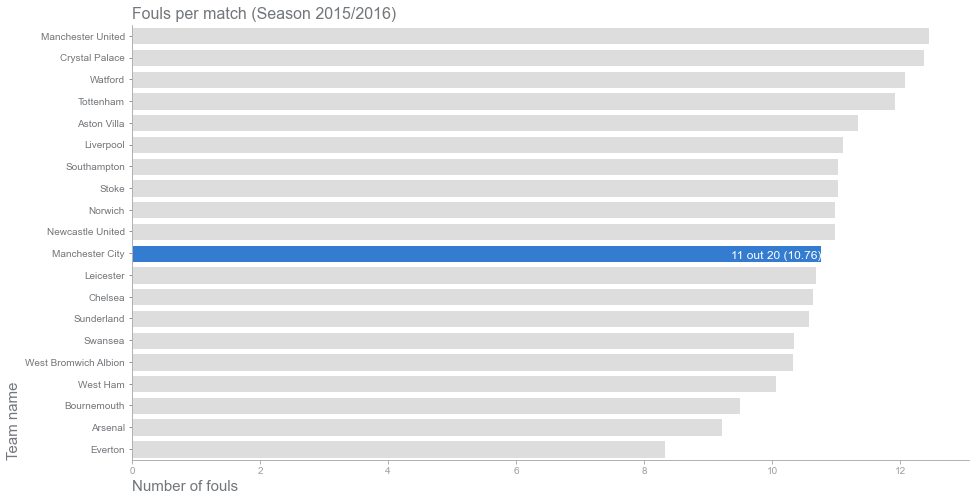

In [79]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
fouls_plot = sns.barplot(y='name', x='fouls', data=season_stats_15_16_results_pd.sort_values('fouls', 
                                                            ascending=False), orient="h")

for bar in fouls_plot.patches:
    if bar.get_width() == 10.763157894736842:
        bar.set_facecolor('#337CCF')
        fouls_plot.annotate(f'11 out 20 ({bar.get_width():.2f})', (bar.get_x() + bar.get_width(),
            bar.get_y() + bar.get_height()- 0.05), ha='right', va='center', fontsize=12, color='white',xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

fouls_plot.set_title('Fouls per match (Season 2015/2016)', fontsize = 16, loc="left", color='#73777B')
fouls_plot.set_xlabel('Number of fouls', fontsize = 15, loc="left",  color='#73777B')
fouls_plot.tick_params(axis='x', colors='#9E9FA5')
fouls_plot.tick_params(axis='y', colors='#73777B')
fouls_plot.spines['bottom'].set_color('#9E9FA5')
fouls_plot.spines['left'].set_color('#9E9FA5')
_ = fouls_plot.set_ylabel('Team name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

In the season, the team had a bit less fouls than in the previos one, but had more than the champion Leicester.

#### Passes	<a class="anchor" id="passes1516"></a>

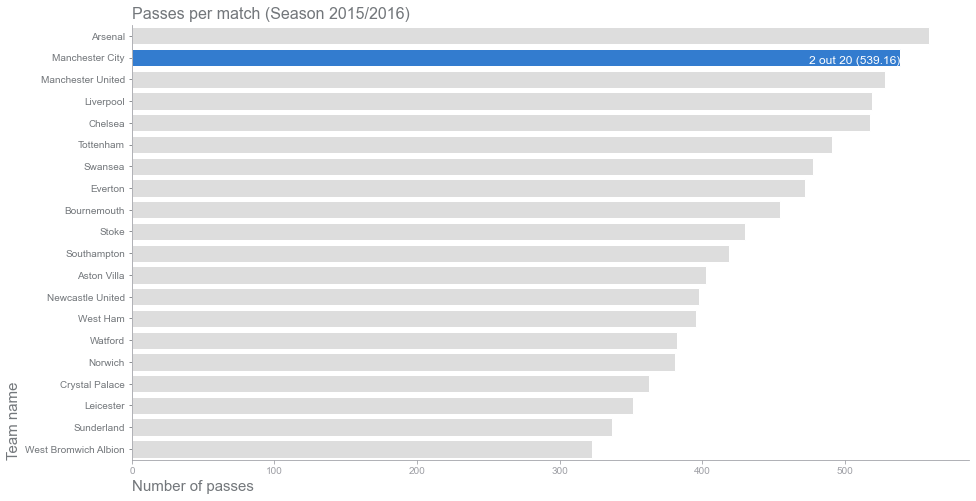

In [80]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
passes_plot = sns.barplot(y='name', x='passes', data=season_stats_15_16_results_pd.sort_values('passes', 
                                                            ascending=False), orient="h")

for bar in passes_plot.patches:
    if bar.get_width() == 539.1578947368421:
        bar.set_facecolor('#337CCF')
        passes_plot.annotate(f'2 out 20 ({bar.get_width():.2f})', (bar.get_x() + bar.get_width(),
            bar.get_y() + bar.get_height()- 0.05), ha='right', va='center', fontsize=12, color='white',xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

passes_plot.set_title('Passes per match (Season 2015/2016)', fontsize = 16, loc="left", color='#73777B')
passes_plot.set_xlabel('Number of passes', fontsize = 15, loc="left",  color='#73777B')
passes_plot.tick_params(axis='x', colors='#9E9FA5')
passes_plot.tick_params(axis='y', colors='#73777B')
passes_plot.spines['bottom'].set_color('#9E9FA5')
passes_plot.spines['left'].set_color('#9E9FA5')
_ = passes_plot.set_ylabel('Team name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

Here we have the same situation than with the precision, the team was overcome by Arsenal and less passes than the previous season.

### Goals<a class="anchor" id="goals1516"></a>

Let's see now all the goals for and against of each team.

In [81]:
#I cast the scores to allow their sum
season_match_stats_15_16 = season_match_stats_15_16.withColumn("half_time_score_home_team", 
                                                    season_match_stats_15_16["half_time_score_home_team"].cast(IntegerType()))
season_match_stats_15_16 = season_match_stats_15_16.withColumn("half_time_score_away_team", 
                                                    season_match_stats_15_16["half_time_score_away_team"].cast(IntegerType()))
season_match_stats_15_16 = season_match_stats_15_16.withColumn("full_time_score_home_team", 
                                                    season_match_stats_15_16["full_time_score_home_team"].cast(IntegerType()))
season_match_stats_15_16 = season_match_stats_15_16.withColumn("full_time_score_away_team", 
                                                    season_match_stats_15_16["full_time_score_away_team"].cast(IntegerType()))

#I get the goals for done in home
season_match_stats_15_16_goals_for_home = season_match_stats_15_16.groupBy('home_team_name').sum('full_time_score_home_team'
          ).withColumnRenamed('sum(full_time_score_home_team)', 'goals_for').withColumnRenamed('home_team_name', 'team')

#I get the goals for done away
season_match_stats_15_16_goals_for_away = season_match_stats_15_16.groupBy('away_team_name').sum('full_time_score_away_team'
          ).withColumnRenamed('sum(full_time_score_away_team)', 'goals_for').withColumnRenamed('away_team_name', 'team')

#I sum both home and away goals
season_match_stats_15_16_goals_for = season_match_stats_15_16_goals_for_home.union(season_match_stats_15_16_goals_for_away
                        ).groupBy('team').sum('goals_for').withColumnRenamed('sum(goals_for)', 'goals_for')

In [82]:
#I get the goals against done in home
season_match_stats_15_16_goals_against_home = season_match_stats_15_16.groupBy('home_team_name').sum('full_time_score_away_team'
        ).withColumnRenamed('sum(full_time_score_away_team)', 'goals_against').withColumnRenamed('home_team_name', 'team')

#I get the goals against done away
season_match_stats_15_16_goals_against_away = season_match_stats_15_16.groupBy('away_team_name').sum('full_time_score_home_team'
       ).withColumnRenamed('sum(full_time_score_home_team)', 'goals_against').withColumnRenamed('away_team_name', 'team')

# I sum both home and away goals against
season_match_stats_15_16_goals_against = season_match_stats_15_16_goals_against_home.union(
    season_match_stats_15_16_goals_against_away).groupBy('team').sum('goals_against').withColumnRenamed(
                                                                'sum(goals_against)', 'goals_against')

season_match_stats_15_16_goals_against = season_match_stats_15_16_goals_against.withColumnRenamed('team', 'team2')

#I join both goals, for and against into the same table
season_match_stats_15_16_goals = season_match_stats_15_16_goals_against.join(season_match_stats_15_16_goals_for, 
                  season_match_stats_15_16_goals_for.team==season_match_stats_15_16_goals_against.team2,"inner")

# I order by goals for
season_match_stats_15_16_goals_pd = season_match_stats_15_16_goals.orderBy("goals_for", ascending=False).toPandas()
season_match_stats_15_16_goals_pd = season_match_stats_15_16_goals_pd.drop('team2', axis=1)

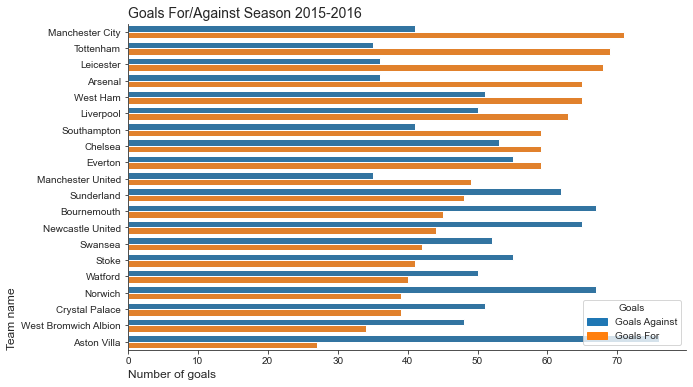

In [83]:
df_melted = pd.melt(season_match_stats_15_16_goals_pd, id_vars='team', var_name='Goals', value_name='Count')
plt.figure(figsize=(10, 6))
goals_1415_plot = sns.barplot(y='team', x='Count', hue='Goals', data=df_melted, orient='h')
goals_1415_plot.set_ylabel('Team name', fontsize = 12, loc="bottom")
goals_1415_plot.set_xlabel('Number of goals', fontsize = 12, loc="left")
goals_1415_plot.set_title('Goals For/Against Season 2015-2016', fontsize = 14, loc="left")

palette = sns.color_palette(n_colors=len(df_melted['Goals'].unique()))
custom_legend = {'Goals Against': palette[0], 'Goals For': palette[1]}
handles = [plt.Rectangle((0,0),1,1, color=color) for color in custom_legend.values()]
legend = plt.legend(handles, custom_legend.keys(), title='Goals')
sns.despine()

In this season Manchester City was the team with more Goal For, but **it had more Goals Against and less Goals For than in the previous season**.

### Summary Season 2015/2016<a class="anchor" id="summary1516"></a>

If we compare the team with the Leicester and Arsenal, the team had a bit more fouls.

Arsenal finished in the 2nd place, with more passes and precision than Manchester City

This was a worse season for Manchester City than the previous one, finished in the 4th place.

--------------------------

## Season 2016/2017<a class="anchor" id="season1617"></a>

Let's explore now the season, in this one, Josep Guardiola started to work in Manchester City.

In [84]:
sqlContext.sql('DROP TABLE IF EXISTS season_match_stats_16_17')
sqlContext.registerDataFrameAsTable(season_match_stats_16_17,'season_match_stats_16_17')

In [85]:
#I create a new column to set the result of the match (Won, Lost, Drawn)
MC_16_17 = season_match_stats_16_17.where("home_team_id == '167' OR away_team_id == '167'")
MC_16_17 = MC_16_17.withColumn('result', 
      when(((MC_16_17.home_team_id == '167') & (MC_16_17.full_time_score_home_team.cast('float') > 
                                                MC_16_17.full_time_score_away_team.cast('float'))), lit("Won"))
      .when(((MC_16_17.home_team_id == '167') & (MC_16_17.full_time_score_home_team.cast('float') < 
                                                 MC_16_17.full_time_score_away_team.cast('float'))), lit("Lost"))
      .when(((MC_16_17.away_team_id == '167') & (MC_16_17.full_time_score_away_team.cast('float') > 
                                                 MC_16_17.full_time_score_home_team.cast('float'))), lit("Won"))
      .when(((MC_16_17.away_team_id == '167') & (MC_16_17.full_time_score_away_team.cast('float') < 
                                                 MC_16_17.full_time_score_home_team.cast('float'))), lit("Lost"))
      .otherwise(lit("Drawn")))

### Away Matches<a class="anchor" id="season1617"></a>

In [86]:
MC_16_17_away_results = MC_16_17.select("away_team_id","result")\
    .where("away_team_id == '167'")\
    .groupBy('away_team_id',"result")\
    .count()\
    .withColumnRenamed('count', 'matches')
MC_16_17_away_results.show()

+------------+------+-------+
|away_team_id|result|matches|
+------------+------+-------+
|         167|   Won|     12|
|         167| Drawn|      2|
|         167|  Lost|      5|
+------------+------+-------+



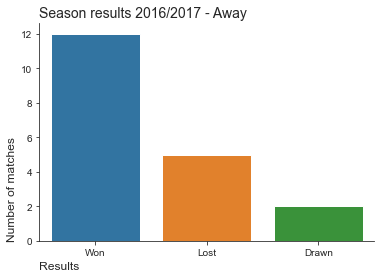

In [87]:
MC_16_17_away_results_PD = MC_16_17_away_results.toPandas()
MC_16_17_home_results_PD = MC_16_17.where("away_team_id == '167'").toPandas()
MC_16_17_home_results_plot = sns.countplot(data=MC_16_17_home_results_PD, x="result")
MC_16_17_home_results_plot.set_ylabel('Number of matches', loc="bottom", fontsize=12)
MC_16_17_home_results_plot.set_xlabel('Results', loc="left", fontsize=12)
MC_16_17_home_results_plot.set_title('Season results 2016/2017 - Away', loc="left", fontsize=14)
sns.despine()

In this season, the team had a better performance than the previous one. They Has won 12 matches of 19, and had less draws matches.

Let's explore the Lost matches.

In [88]:
#I get the scores of the matches away that Manchester City lost
MC_16_17.select("full_time_score_home_team","full_time_score_away_team").where(
                "away_team_id == '167' AND result == 'Lost'")\
                .withColumnRenamed('full_time_score_home_team', 'Final Score Home Team')\
                .withColumnRenamed('full_time_score_away_team', 'Final Score MC').show()

+---------------------+--------------+
|Final Score Home Team|Final Score MC|
+---------------------+--------------+
|                    2|             0|
|                    4|             2|
|                    4|             0|
|                    1|             0|
|                    2|             1|
+---------------------+--------------+



In [89]:
#I cast the scores to interger in order to allow to compare them
MC_16_17 = MC_16_17.withColumn("half_time_score_home_team",MC_16_17["half_time_score_home_team"].cast(IntegerType()))
MC_16_17 = MC_16_17.withColumn("half_time_score_away_team",MC_16_17["half_time_score_away_team"].cast(IntegerType()))
MC_16_17 = MC_16_17.withColumn("full_time_score_home_team",MC_16_17["full_time_score_home_team"].cast(IntegerType()))
MC_16_17 = MC_16_17.withColumn("full_time_score_away_team",MC_16_17["full_time_score_away_team"].cast(IntegerType()))
MC_16_17 = MC_16_17.withColumn("date_string", to_date(col("date_string"),'dd/MM/yyyy HH:mm:ss'))

In [90]:
#I get the matches that Manchester City lost where they ended the first half lossing
MC_16_17.select("half_time_score_home_team","half_time_score_away_team","full_time_score_home_team",
                  "full_time_score_away_team",'home_team_name').where(
                "away_team_id == '167' AND result == 'Lost' AND half_time_score_home_team > half_time_score_away_team")\
                .withColumnRenamed('half_time_score_home_team', 'Half Time Home Team')\
                .withColumnRenamed('half_time_score_away_team', 'Half Time Manchester City')\
                .withColumnRenamed('full_time_score_home_team', 'Final Score Home Team')\
                .withColumnRenamed('full_time_score_away_team', 'Final Score Manchester City')\
                .withColumnRenamed('home_team_name', 'Home Team').show() 

+-------------------+-------------------------+---------------------+---------------------------+---------+
|Half Time Home Team|Half Time Manchester City|Final Score Home Team|Final Score Manchester City|Home Team|
+-------------------+-------------------------+---------------------+---------------------------+---------+
|                  2|                        0|                    2|                          0|Tottenham|
|                  3|                        0|                    4|                          2|Leicester|
|                  1|                        0|                    4|                          0|  Everton|
|                  1|                        0|                    1|                          0|Liverpool|
|                  2|                        1|                    2|                          1|  Chelsea|
+-------------------+-------------------------+---------------------+---------------------------+---------+



Like the previous season, most of the lost matches were for more than 1 goal against, and were commited in the first half.

Let's see the draw matches.

In [91]:
#I get the drawn matches
MC_16_17.select("half_time_score_home_team","half_time_score_away_team","full_time_score_home_team",
                  'home_team_name').where("away_team_id == '167' AND result == 'Drawn'")\
                .withColumnRenamed('half_time_score_home_team', 'Half Time Away Team')\
                .withColumnRenamed('half_time_score_away_team', 'Half Time Manchester City')\
                .withColumnRenamed('full_time_score_home_team', 'Final Score')\
                .withColumnRenamed('home_team_name', 'Home Team')\
                .show() 

+-------------------+-------------------------+-----------+-------------+
|Half Time Away Team|Half Time Manchester City|Final Score|    Home Team|
+-------------------+-------------------------+-----------+-------------+
|                  1|                        2|          2|      Arsenal|
|                  1|                        0|          2|Middlesbrough|
+-------------------+-------------------------+-----------+-------------+



We have only 2 matches. In one of these, the away team drew the match in the 2nd half. In the other match, Manchester City drew it in the second half.

### Home Matches<a class="anchor" id="homeMatches1617"></a>

Let's see now the performance of the team in home.

In [92]:
MC_16_17_home_results = MC_16_17.select("home_team_id","result").where("home_team_id == '167'"
                                                    ).groupBy('home_team_id',"result").count()
MC_16_17_home_results = MC_16_17_home_results.withColumnRenamed('count', 'matches')
MC_16_17_home_results.show()

+------------+------+-------+
|home_team_id|result|matches|
+------------+------+-------+
|         167|   Won|     11|
|         167| Drawn|      7|
|         167|  Lost|      1|
+------------+------+-------+



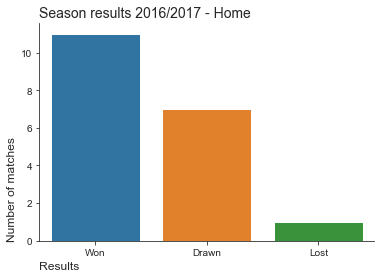

In [93]:
MC_16_17_home_results_PD = MC_16_17.where("home_team_id == '167'").toPandas()
MC_16_17_home_results_plot = sns.countplot(data=MC_16_17_home_results_PD, x="result")
MC_16_17_home_results_plot.set_ylabel('Number of matches', loc="bottom", fontsize=12)
MC_16_17_home_results_plot.set_xlabel('Results', loc="left", fontsize=12)
MC_16_17_home_results_plot.set_title('Season results 2016/2017 - Home', loc="left", fontsize=14)
sns.despine()

In home the team lost only one match, but there are much more draws than in the previous season.

Let's see the lost match.

In [94]:
MC_16_17.select("half_time_score_home_team","half_time_score_away_team","full_time_score_home_team",
                  "full_time_score_away_team",'away_team_name')\
.withColumnRenamed('half_time_score_home_team', 'Half Time Score Manchester City')\
.withColumnRenamed('half_time_score_away_team', 'Half Time Score Away Team')\
.withColumnRenamed('full_time_score_home_team', 'Final Score Mancheser City')\
.withColumnRenamed('full_time_score_away_team', 'Final Score Away Team')\
.withColumnRenamed('away_team_name', 'Team')\
.where("home_team_id == '167' AND result == 'Lost'").show() 

+-------------------------------+-------------------------+--------------------------+---------------------+-------+
|Half Time Score Manchester City|Half Time Score Away Team|Final Score Mancheser City|Final Score Away Team|   Team|
+-------------------------------+-------------------------+--------------------------+---------------------+-------+
|                              1|                        0|                         1|                    3|Chelsea|
+-------------------------------+-------------------------+--------------------------+---------------------+-------+



They lost against the champion, Chelsea.

### Goals and general results<a class="anchor" id="goalsResults1617"></a>

Let's see the Goals For/Against of this season.

In [95]:
#I get the goals for done in home
MC_16_17_goals_for_home = MC_16_17.groupBy('home_team_id').sum('full_time_score_home_team').where("home_team_id == '167'"
          ).withColumnRenamed('sum(full_time_score_home_team)', 'goals_for').withColumnRenamed('home_team_id', 'team')

#I get the goals for done away
MC_16_17_goals_for_away = MC_16_17.groupBy('away_team_id').sum('full_time_score_away_team').where("away_team_id == '167'"
        ).withColumnRenamed('sum(full_time_score_away_team)', 'goals_for').withColumnRenamed('away_team_id', 'team')

#Get all goals for by union both home and away
MC_16_17_goals_for = MC_16_17_goals_for_home.union(MC_16_17_goals_for_away).groupBy('team').sum('goals_for'
                                                                  ).withColumnRenamed('sum(goals_for)', 'goals_for')

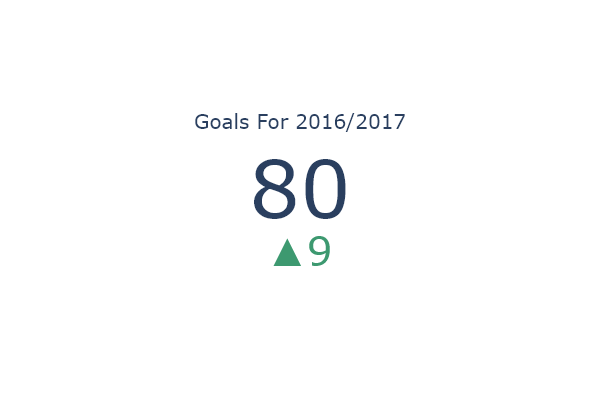

In [96]:
goals_for_16_17 = MC_16_17_goals_for.select("goals_for").collect()[0][0]
fig_goals_for_16_17 = go.Figure()
fig_goals_for_16_17.add_trace(go.Indicator(
    mode = "number+delta",
    delta = {'position': "bottom", 'reference': goals_for_15_16},
    value = goals_for_16_17,
    title = {"text": "Goals For 2016/2017", 'align': "center", },
    domain = {'x': [0, 1], 'y': [0, 1]}
    ))
fig_goals_for_16_17.update_layout(width=600, height=400)
fig_goals_for_16_17.show('png')

In [97]:
#I get the against for done in home
MC_16_17_goals_against_home = MC_16_17.groupBy('home_team_id').sum('full_time_score_away_team').where("home_team_id == '167'"
          ).withColumnRenamed('sum(full_time_score_away_team)', 'goals_against').withColumnRenamed('home_team_id', 'team')

#I get the against for done away
MC_16_17_goals_against_away = MC_16_17.groupBy('away_team_id').sum('full_time_score_home_team').where("away_team_id == '167'"
          ).withColumnRenamed('sum(full_time_score_home_team)', 'goals_against').withColumnRenamed('away_team_id', 'team')

#Get all goals against by union both home and away
MC_16_17_goals_against = MC_16_17_goals_against_home.union(MC_16_17_goals_against_away).groupBy('team').sum('goals_against'
                                                            ).withColumnRenamed('sum(goals_against)', 'goals_against')

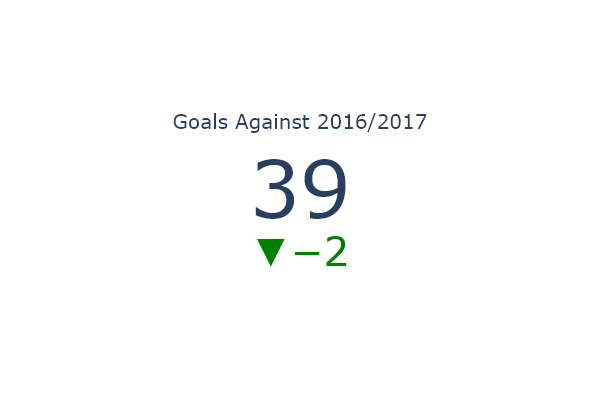

In [100]:
goals_against_16_17 = MC_16_17_goals_against.select("goals_against").collect()[0][0]
fig_goals_against_16_17 = go.Figure()
fig_goals_against_16_17.add_trace(go.Indicator(
    mode = "number+delta",
    delta = {'position': "bottom", 'reference': goals_against_15_16, "increasing": {"color": 'red', "symbol": '▲'}, 
             "decreasing": {"color": 'green', "symbol": '▼'}},
    value = goals_against_16_17,
    title = {"text": "Goals Against 2016/2017", 'align': "center"},
    domain = {'x': [0, 1], 'y': [0, 1]}
    ))
fig_goals_against_16_17.update_layout(width=600, height=400)
fig_goals_against_16_17.show('png')

And now the General Results.

In [101]:
MC_16_17_results = MC_16_17_home_results.union(MC_16_17_away_results)
MC_16_17_results = MC_16_17_results.groupBy('home_team_id','result').sum()
MC_16_17_results = MC_16_17_results.withColumnRenamed('sum(matches)', 'matches')
MC_16_17_results.show()

+------------+------+-------+
|home_team_id|result|matches|
+------------+------+-------+
|         167|   Won|     23|
|         167| Drawn|      9|
|         167|  Lost|      6|
+------------+------+-------+



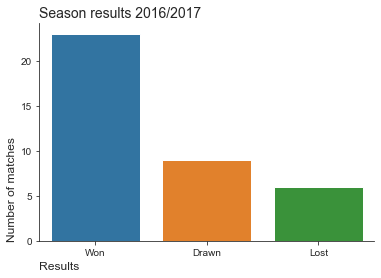

In [102]:
MC_16_17_results_plot = sns.barplot(x='result', y='matches', data=MC_16_17_results.toPandas())
MC_16_17_results_plot.set_ylabel('Number of matches', loc="bottom", fontsize=12)
MC_16_17_results_plot.set_xlabel('Results', loc="left", fontsize=12)
MC_16_17_results_plot.set_title('Season results 2016/2017', loc="left", fontsize=14)
sns.despine()

To summarise, in thie season the team won 23 matches, lost 6 and drew 9.

### Season Stats<a class="anchor" id="stats1617"></a>

Let's explore now the stats.

In [103]:
#Collect all stats from away matches
season_stats_16_17_away = season_stats_16_17.select(
"away_team.aggregate_stats.possession_percentage",
"away_team.aggregate_stats.ontarget_scoring_att",
"away_team.aggregate_stats.total_scoring_att",
"away_team.aggregate_stats.fk_foul_lost",
"away_team.aggregate_stats.goals",
"away_team.aggregate_stats.total_pass",
"away_team.aggregate_stats.accurate_pass",
"away_team.team_details.team_id",
).withColumnRenamed('possession_percentage', 'possession')\
.withColumnRenamed('accurate_pass', 'acc_pass')\
.withColumnRenamed('total_pass', 'passes')

#Collect all stats from home matches
season_stats_16_17_home = season_stats_16_17.select(
"home_team.aggregate_stats.possession_percentage",
"home_team.aggregate_stats.ontarget_scoring_att",
"home_team.aggregate_stats.total_scoring_att",
"home_team.aggregate_stats.fk_foul_lost",
"home_team.aggregate_stats.goals",
"home_team.aggregate_stats.total_pass",
"home_team.aggregate_stats.accurate_pass",
"home_team.team_details.team_id",
).withColumnRenamed('possession_percentage', 'possession')\
.withColumnRenamed('accurate_pass', 'acc_pass')\
.withColumnRenamed('total_pass', 'passes')

#Merge both stats
season_stats_16_17_results = season_stats_16_17_home.union(season_stats_16_17_away)

#Calculate the average of the stats
season_stats_16_17_results = season_stats_16_17_results.withColumn('passes_precision', (col('acc_pass') / col('passes')
                                                                                       ).cast(DecimalType(2,2)))\
.groupBy('team_id')\
.agg({"possession":"avg","goals":"sum", "ontarget_scoring_att":"avg", "total_scoring_att":"avg", "passes":"avg", 
      "passes_precision":"avg", "fk_foul_lost":"avg"})\
.withColumnRenamed('avg(fk_foul_lost)', 'fouls')\
.withColumnRenamed('avg(passes)', 'passes')\
.withColumnRenamed('avg(ontarget_scoring_att)', 'target_shots')\
.withColumnRenamed('avg(total_scoring_att)', 'shots')\
.withColumnRenamed('avg(possession)', 'possession')\
.withColumnRenamed('avg(passes_precision)', 'passes_prec')\
.withColumnRenamed('sum(goals)', 'goals')

#I do a join to get the team nome
season_stats_16_17_results = season_stats_16_17_results.join(season_match_stats_16_17, 
         season_match_stats_16_17.home_team_id==season_stats_16_17_results.team_id,"inner")\
.select('home_team_name', 'fouls', 'passes', 'target_shots', 'shots', 'possession', 'goals', 'passes_prec'
       ).withColumnRenamed('home_team_name', 'name').dropDuplicates()

In [104]:
season_stats_16_17_results_pd = season_stats_16_17_results.toPandas().sort_values('possession', ascending=False)

#### Possession	<a class="anchor" id="possession1617"></a>

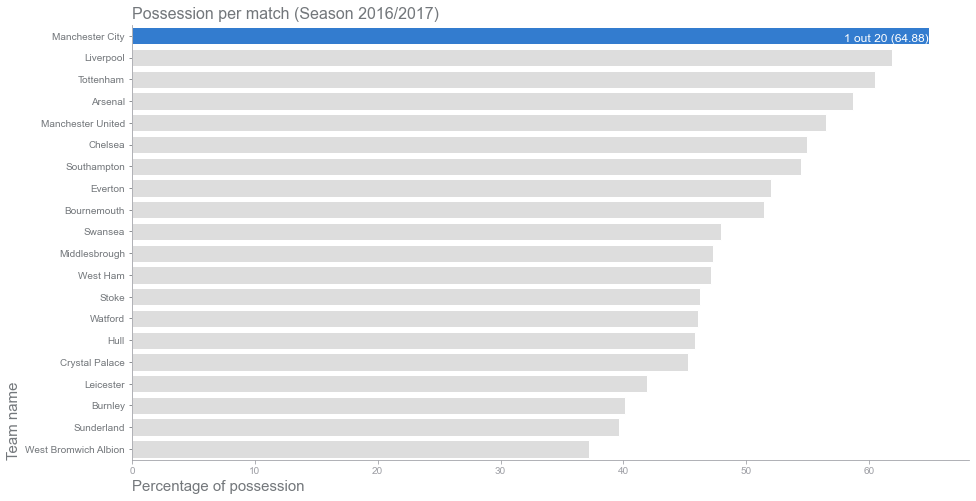

In [105]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
posession_plot = sns.barplot(y='name', x='possession', data=season_stats_16_17_results_pd.sort_values('possession', 
                                                                                        ascending=False), orient="h")

for bar in posession_plot.patches:
    if bar.get_width() == 64.88421052631578:
        bar.set_facecolor('#337CCF')
        posession_plot.annotate(f'1 out 20 ({bar.get_width():.2f})', (bar.get_x() + bar.get_width(),
            bar.get_y() + bar.get_height()- 0.05), ha='right', va='center', fontsize=12, color='white',xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

posession_plot.set_title('Possession per match (Season 2016/2017)', fontsize = 16, loc="left", color='#73777B')
posession_plot.set_xlabel('Percentage of possession', fontsize = 15, loc="left",  color='#73777B')
posession_plot.tick_params(axis='x', colors='#9E9FA5')
posession_plot.tick_params(axis='y', colors='#73777B')
posession_plot.spines['bottom'].set_color('#9E9FA5')
posession_plot.spines['left'].set_color('#9E9FA5')
_ = posession_plot.set_ylabel('Team name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

The Manchester City is the team with most average of posession of the season.

#### Shots<a class="anchor" id="shots1617"></a>

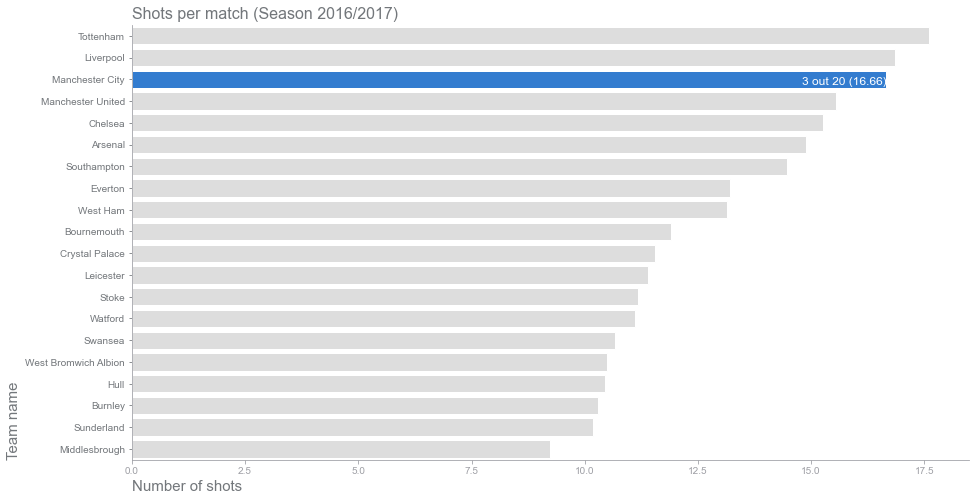

In [106]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
shots_plot = sns.barplot(y='name', x='shots', data=season_stats_16_17_results_pd.sort_values('shots', ascending=False), 
                             orient="h")

for bar in shots_plot.patches:
    if bar.get_width() == 16.657894736842106:
        bar.set_facecolor('#337CCF')
        shots_plot.annotate(f'3 out 20 ({bar.get_width():.2f})', (bar.get_x() + bar.get_width(),
            bar.get_y() + bar.get_height()- 0.05), ha='right', va='center', fontsize=12, color='white',xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

shots_plot.set_title('Shots per match (Season 2016/2017)', fontsize = 16, loc="left", color='#73777B')
shots_plot.set_xlabel('Number of shots', fontsize = 15, loc="left",  color='#73777B')
shots_plot.tick_params(axis='x', colors='#9E9FA5')
shots_plot.tick_params(axis='y', colors='#73777B')
shots_plot.spines['bottom'].set_color('#9E9FA5')
shots_plot.spines['left'].set_color('#9E9FA5')
_ = shots_plot.set_ylabel('Team name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

Here we can see that the team was overcome by Tottenham and Liverpool

#### Shots in the target<a class="anchor" id="shotsTarget1617"></a>

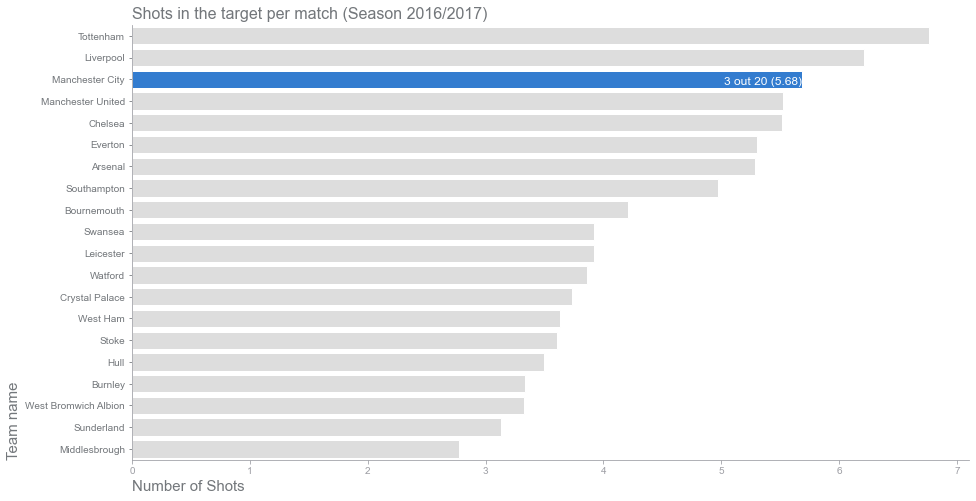

In [107]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
target_shots_plot = sns.barplot(y='name', x='target_shots', data=season_stats_16_17_results_pd.sort_values('target_shots', 
                                                            ascending=False), orient="h")

for bar in target_shots_plot.patches:
    if bar.get_width() == 5.684210526315789:
        bar.set_facecolor('#337CCF')
        target_shots_plot.annotate(f'3 out 20 ({bar.get_width():.2f})', (bar.get_x() + bar.get_width(),
            bar.get_y() + bar.get_height()- 0.05), ha='right', va='center', fontsize=12, color='white',xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

target_shots_plot.set_title('Shots in the target per match (Season 2016/2017)', fontsize = 16, loc="left", color='#73777B')
target_shots_plot.set_xlabel('Number of Shots', fontsize = 15, loc="left",  color='#73777B')
target_shots_plot.tick_params(axis='x', colors='#9E9FA5')
target_shots_plot.tick_params(axis='y', colors='#73777B')
target_shots_plot.spines['bottom'].set_color('#9E9FA5')
target_shots_plot.spines['left'].set_color('#9E9FA5')
_ = target_shots_plot.set_ylabel('Team name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

We see here that Liverpool and Tottenham had more shots than Manchester City, and also they had more shots on target. With similar shots, Arsenal was a little more accurate than Manchester City. But the team with most goals for was Chelsea.

#### Passes precision<a class="anchor" id="passessPre1617"></a>

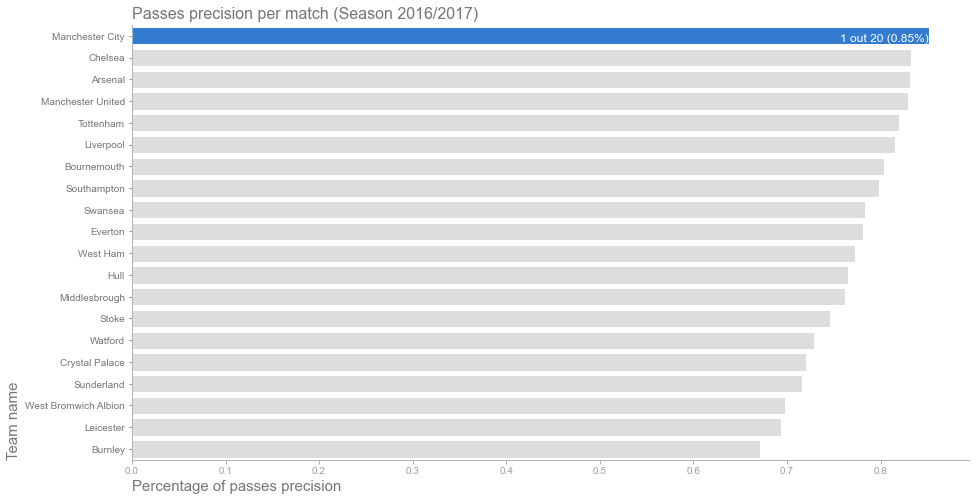

In [108]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
passes_prec_plot = sns.barplot(y='name', x='passes_prec', data=season_stats_16_17_results_pd.sort_values('passes_prec', 
                                                            ascending=False), orient="h")

for bar in passes_prec_plot.patches:
    if bar.get_width() == 0.851842:
        bar.set_facecolor('#337CCF')
        passes_prec_plot.annotate(f'1 out 20 ({bar.get_width():.2f}%)', (bar.get_x() + bar.get_width(),
            bar.get_y() + bar.get_height()- 0.05), ha='right', va='center', fontsize=12, color='white',xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

passes_prec_plot.set_title('Passes precision per match (Season 2016/2017)', fontsize = 16, loc="left", color='#73777B')
passes_prec_plot.set_xlabel('Percentage of passes precision', fontsize = 15, loc="left",  color='#73777B')
passes_prec_plot.tick_params(axis='x', colors='#9E9FA5')
passes_prec_plot.tick_params(axis='y', colors='#73777B')
passes_prec_plot.spines['bottom'].set_color('#9E9FA5')
passes_prec_plot.spines['left'].set_color('#9E9FA5')
_ = passes_prec_plot.set_ylabel('Team name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

Here we can see that the team has the best precision of passes.

#### Fouls <a class="anchor" id="fouls1617"></a>

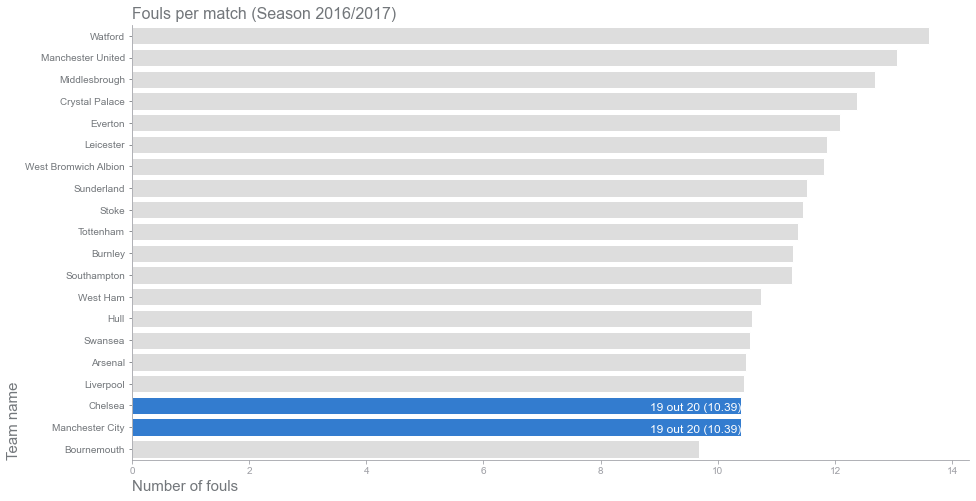

In [109]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
fouls_plot = sns.barplot(y='name', x='fouls', data=season_stats_16_17_results_pd.sort_values('fouls', 
                                                            ascending=False), orient="h")

for bar in fouls_plot.patches:
    if bar.get_width() == 10.394736842105264:
        bar.set_facecolor('#337CCF')
        fouls_plot.annotate(f'19 out 20 ({bar.get_width():.2f})', (bar.get_x() + bar.get_width(),
            bar.get_y() + bar.get_height()- 0.05), ha='right', va='center', fontsize=12, color='white',xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

fouls_plot.set_title('Fouls per match (Season 2016/2017)', fontsize = 16, loc="left", color='#73777B')
fouls_plot.set_xlabel('Number of fouls', fontsize = 15, loc="left",  color='#73777B')
fouls_plot.tick_params(axis='x', colors='#9E9FA5')
fouls_plot.tick_params(axis='y', colors='#73777B')
fouls_plot.spines['bottom'].set_color('#9E9FA5')
fouls_plot.spines['left'].set_color('#9E9FA5')
_ = fouls_plot.set_ylabel('Team name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

A good signal, the team is one of the team with the lowest fouls with Chelsea.

#### Passes	<a class="anchor" id="passes1617"></a>

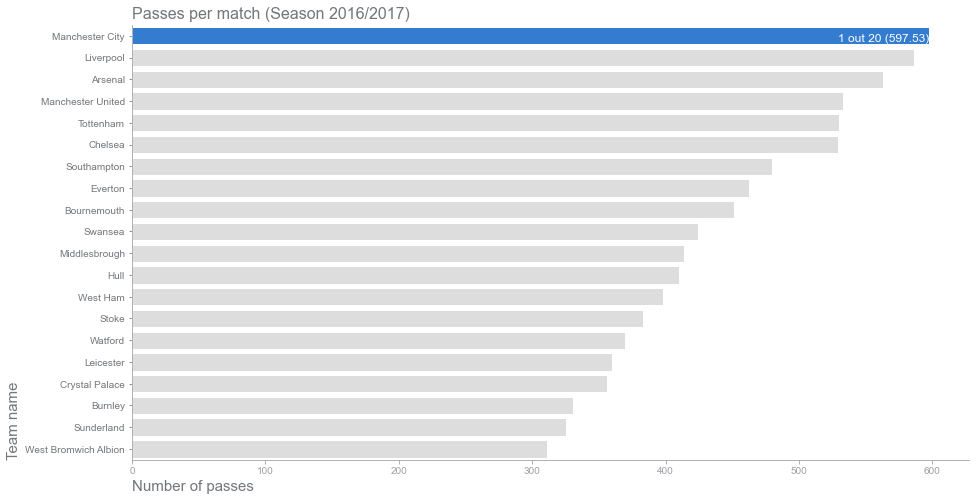

In [110]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
passes_plot = sns.barplot(y='name', x='passes', data=season_stats_16_17_results_pd.sort_values('passes', 
                                                            ascending=False), orient="h")

for bar in passes_plot.patches:
    if bar.get_width() == 597.5263157894736:
        bar.set_facecolor('#337CCF')
        passes_plot.annotate(f'1 out 20 ({bar.get_width():.2f})', (bar.get_x() + bar.get_width(),
            bar.get_y() + bar.get_height()- 0.05), ha='right', va='center', fontsize=12, color='white',xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

passes_plot.set_title('Passes per match (Season 2016/2017)', fontsize = 16, loc="left", color='#73777B')
passes_plot.set_xlabel('Number of passes', fontsize = 15, loc="left",  color='#73777B')
passes_plot.tick_params(axis='x', colors='#9E9FA5')
passes_plot.tick_params(axis='y', colors='#73777B')
passes_plot.spines['bottom'].set_color('#9E9FA5')
passes_plot.spines['left'].set_color('#9E9FA5')
_ = passes_plot.set_ylabel('Team name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

Here we have the same situation than the precision, it this the team with most average of passes.

### Goals<a class="anchor" id="goals1617"></a>

Now let's see the Goals For and Against of all the teams.

In [111]:
#I cast the scores to allow the sum
season_match_stats_16_17 = season_match_stats_16_17.withColumn("half_time_score_home_team", 
                                season_match_stats_16_17["half_time_score_home_team"].cast(IntegerType()))
season_match_stats_16_17 = season_match_stats_16_17.withColumn("half_time_score_away_team",
                                season_match_stats_16_17["half_time_score_away_team"].cast(IntegerType()))
season_match_stats_16_17 = season_match_stats_16_17.withColumn("full_time_score_home_team",
                                season_match_stats_16_17["full_time_score_home_team"].cast(IntegerType()))
season_match_stats_16_17 = season_match_stats_16_17.withColumn("full_time_score_away_team",
                                season_match_stats_16_17["full_time_score_away_team"].cast(IntegerType()))

#I get the goals for done in home
season_match_stats_16_17_goals_for_home = season_match_stats_16_17.groupBy('home_team_name').sum('full_time_score_home_team'
            ).withColumnRenamed('sum(full_time_score_home_team)', 'goals_for').withColumnRenamed('home_team_name', 'team')

#I get the goals for done away
season_match_stats_16_17_goals_for_away = season_match_stats_16_17.groupBy('away_team_name').sum('full_time_score_away_team'
            ).withColumnRenamed('sum(full_time_score_away_team)', 'goals_for').withColumnRenamed('away_team_name', 'team')

#I sum both home and away goals
season_match_stats_16_17_goals_for=season_match_stats_16_17_goals_for_home.union(season_match_stats_16_17_goals_for_away
                                      ).groupBy('team').sum('goals_for').withColumnRenamed('sum(goals_for)', 'goals_for')

In [112]:
#I get the goals against done in home
season_match_stats_16_17_goals_against_home = season_match_stats_16_17.groupBy('home_team_name').sum('full_time_score_away_team'
           ).withColumnRenamed('sum(full_time_score_away_team)', 'goals_against').withColumnRenamed('home_team_name', 'team')

#I get the goals against done away
season_match_stats_16_17_goals_against_away = season_match_stats_16_17.groupBy('away_team_name').sum('full_time_score_home_team'
           ).withColumnRenamed('sum(full_time_score_home_team)', 'goals_against').withColumnRenamed('away_team_name', 'team')

# I sum both home and away goals against
season_match_stats_16_17_goals_against = season_match_stats_16_17_goals_against_home.union(
    season_match_stats_16_17_goals_against_away).groupBy('team').sum('goals_against').withColumnRenamed(
    'sum(goals_against)', 'goals_against')

season_match_stats_16_17_goals_against = season_match_stats_16_17_goals_against.withColumnRenamed('team', 'team2')

#I join both goals, for and against into the same table
season_match_stats_16_17_goals = season_match_stats_16_17_goals_against.join(season_match_stats_16_17_goals_for, 
                season_match_stats_16_17_goals_for.team==season_match_stats_16_17_goals_against.team2, "inner")

# I order by goals for
season_match_stats_16_17_goals_pd = season_match_stats_16_17_goals.orderBy("goals_for", ascending=False).toPandas()
season_match_stats_16_17_goals_pd = season_match_stats_16_17_goals_pd.drop('team2', axis=1)

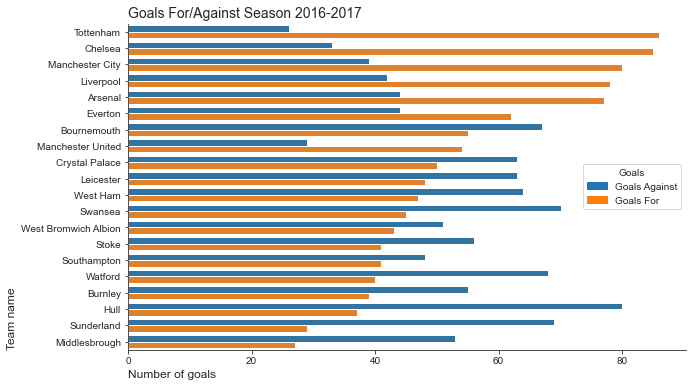

In [113]:
df_melted = pd.melt(season_match_stats_16_17_goals_pd, id_vars='team', var_name='Goals', value_name='Count')

plt.figure(figsize=(10, 6))
goals_1415_plot = sns.barplot(y='team', x='Count', hue='Goals', data=df_melted, orient='h')
goals_1415_plot.set_ylabel('Team name', fontsize=12, loc="bottom")
goals_1415_plot.set_xlabel('Number of goals', fontsize=12, loc="left")
goals_1415_plot.set_title('Goals For/Against Season 2016-2017', fontsize=14, loc="left")

palette = sns.color_palette(n_colors=len(df_melted['Goals'].unique()))
custom_legend = {'Goals Against': palette[0], 'Goals For': palette[1]}
handles = [plt.Rectangle((0,0),1,1, color=color) for color in custom_legend.values()]
legend = plt.legend(handles, custom_legend.keys(), title='Goals')
sns.despine()

We can see that in this season, Manchester City was not the team with most goals for.

### Summary Season 2016/2017<a class="anchor" id="summary1617"></a>

In this season Chelsea had more goals for and less goals against than Manchester City. Chelsea and Manchester City had similar average of passes precision.

Although Manchester City had the best value of possession, they finished the season in the 3rd place. So we can say that a good possession is guarantee of victory.

---------------------------------------------------

## Season 2017/2018<a class="anchor" id="season1718"></a>

Let'a analise now the last season.

In [114]:
MC_17_18 = season_match_stats_17_18.where("home_team_id == '167' OR away_team_id == '167'")
MC_17_18.count()

38

In [115]:
#I create a new column to set the result of the match (Won, Lost, Drawn)
MC_17_18 = MC_17_18.withColumn('result', 
      when(((MC_17_18.home_team_id == '167') & (MC_17_18.full_time_score_home_team.cast('float') > 
                                                MC_17_18.full_time_score_away_team.cast('float'))), lit("Won"))
      .when(((MC_17_18.home_team_id == '167') & (MC_17_18.full_time_score_home_team.cast('float') < 
                                                 MC_17_18.full_time_score_away_team.cast('float'))), lit("Lost"))
      .when(((MC_17_18.away_team_id == '167') & (MC_17_18.full_time_score_away_team.cast('float') > 
                                                 MC_17_18.full_time_score_home_team.cast('float'))), lit("Won"))
      .when(((MC_17_18.away_team_id == '167') & (MC_17_18.full_time_score_away_team.cast('float') < 
                                                 MC_17_18.full_time_score_home_team.cast('float'))), lit("Lost"))
      .otherwise(lit("Drawn")))

### Away Matches<a class="anchor" id="awayMatches1718"></a>

In [116]:
MC_17_18_away_results = MC_17_18.select("away_team_id","result")\
    .where("away_team_id == '167'")\
    .groupBy('away_team_id',"result")\
    .count()
    
MC_17_18_away_results = MC_17_18_away_results.withColumnRenamed('count', 'matches')
MC_17_18_away_results.show()

+------------+------+-------+
|away_team_id|result|matches|
+------------+------+-------+
|         167|   Won|     16|
|         167| Drawn|      2|
|         167|  Lost|      1|
+------------+------+-------+



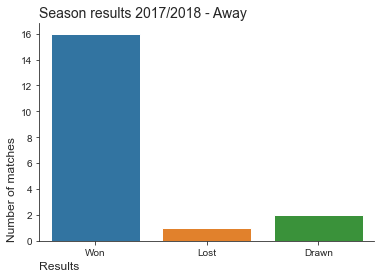

In [117]:
MC_17_18_home_results_PD = MC_17_18.where("away_team_id == '167'").toPandas()
MC_17_18_home_results_plot = sns.countplot(data=MC_17_18_home_results_PD, x="result")
MC_17_18_home_results_plot.set_ylabel('Number of matches', loc="bottom", fontsize=12)
MC_17_18_home_results_plot.set_xlabel('Results', loc="left", fontsize=12)
MC_17_18_home_results_plot.set_title('Season results 2017/2018 - Away', loc="left", fontsize=14)
sns.despine()

The team just lost 1 match, and had 2 draws. It is the best result of the team so far.

Let's see the lost match.

In [118]:
#I get the scores of the matches away that Manchester City lost
MC_17_18.select('home_team_name',"full_time_score_home_team","full_time_score_away_team")\
        .where("away_team_id == '167' AND result == 'Lost'")\
        .withColumnRenamed('home_team_name', 'Home Team Name')\
        .withColumnRenamed('full_time_score_home_team', 'Final Score Away Team')\
        .withColumnRenamed('full_time_score_away_team', 'Final Score Manchester City').show() 

+--------------+---------------------+---------------------------+
|Home Team Name|Final Score Away Team|Final Score Manchester City|
+--------------+---------------------+---------------------------+
|     Liverpool|                    4|                          3|
+--------------+---------------------+---------------------------+



In [119]:
MC_17_18.select("half_time_score_away_team","full_time_score_home_team",
                  "full_time_score_away_team",'home_team_name').where(
                "away_team_id == '167' AND result == 'P' AND half_time_score_home_team > half_time_score_away_team")\
                .withColumnRenamed('half_time_score_home_team', 'Half Time - Home team')\
                .withColumnRenamed('half_time_score_away_team', 'Halg Time - MC')\
                .withColumnRenamed('full_time_score_home_team', 'Final Score - Home team')\
                .withColumnRenamed('full_time_score_away_team', 'Final Score MC')\
                .withColumnRenamed('home_team_name', 'Home Team Name')\
                .show()

+--------------+-----------------------+--------------+--------------+
|Halg Time - MC|Final Score - Home team|Final Score MC|Home Team Name|
+--------------+-----------------------+--------------+--------------+
+--------------+-----------------------+--------------+--------------+



The team lost just 1 match, loosing it in the second half of the match and by one goal against of difference.

Let's explore the draws.

In [120]:
MC_17_18.select("half_time_score_home_team","half_time_score_away_team","full_time_score_home_team",
                  'home_team_name')\
                .where("away_team_id == '167' AND result == 'Drawn'")\
                .withColumnRenamed('half_time_score_home_team', 'Half Time Score - Home Team')\
                .withColumnRenamed('half_time_score_away_team', 'Half Time Score Manchester City')\
                .withColumnRenamed('full_time_score_home_team', 'Final Score - Home Team')\
                .withColumnRenamed('home_team_name', 'Home Team Name').show() 

+---------------------------+-------------------------------+-----------------------+--------------+
|Half Time Score - Home Team|Half Time Score Manchester City|Final Score - Home Team|Home Team Name|
+---------------------------+-------------------------------+-----------------------+--------------+
|                         0 |                              1|                      1|       Burnley|
|                         0 |                              0|                      0|Crystal Palace|
+---------------------------+-------------------------------+-----------------------+--------------+



We found a draw without goals, and the other was drew in the second half of the match.

### Home Matches<a class="anchor" id="homeMatches1718"></a>

Let's see their performance in home

In [121]:
MC_17_18_home_results = MC_17_18.select("home_team_id","result").where("home_team_id == '167'"
                                                ).groupBy('home_team_id',"result").count()
MC_17_18_home_results = MC_17_18_home_results.withColumnRenamed('count', 'matches')
MC_17_18_home_results.show()

+------------+------+-------+
|home_team_id|result|matches|
+------------+------+-------+
|         167|   Won|     16|
|         167| Drawn|      2|
|         167|  Lost|      1|
+------------+------+-------+



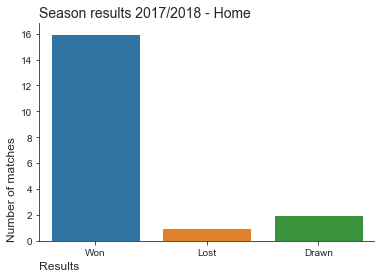

In [122]:
MC_17_18_home_results_PD = MC_17_18.where("home_team_id == '167'").toPandas()
MC_17_18_home_results_plot = sns.countplot(data=MC_17_18_home_results_PD, x="result")
MC_17_18_home_results_plot.set_ylabel('Number of matches', loc="bottom", fontsize=12)
MC_17_18_home_results_plot.set_xlabel('Results', loc="left", fontsize=12)
MC_17_18_home_results_plot.set_title('Season results 2017/2018 - Home', loc="left", fontsize=14)
sns.despine()

In home had the same results than away.

In [123]:
MC_17_18.select("half_time_score_home_team","half_time_score_away_team","full_time_score_home_team",
                  "full_time_score_away_team",'away_team_name')\
.withColumnRenamed('half_time_score_home_team', 'Half Time Score Manchester City')\
.withColumnRenamed('half_time_score_away_team', 'Half Time Score Away Team')\
.withColumnRenamed('full_time_score_home_team', 'Final Score MC')\
.withColumnRenamed('full_time_score_away_team', 'Final Score Away Team')\
.withColumnRenamed('away_team_name', 'Team')\
.where("home_team_id == '167' AND result == 'Lost'").show() 

+-------------------------------+-------------------------+--------------+---------------------+-----------------+
|Half Time Score Manchester City|Half Time Score Away Team|Final Score MC|Final Score Away Team|             Team|
+-------------------------------+-------------------------+--------------+---------------------+-----------------+
|                             2 |                        0|             2|                    3|Manchester United|
+-------------------------------+-------------------------+--------------+---------------------+-----------------+



Like the lost match away, they lost only by one goal against in home.

In [124]:
#I cast the scores to interger in order to allow to compare them
MC_17_18 = MC_17_18.withColumn("half_time_score_home_team", MC_17_18["half_time_score_home_team"].cast(IntegerType()))
MC_17_18 = MC_17_18.withColumn("half_time_score_away_team", MC_17_18["half_time_score_away_team"].cast(IntegerType()))
MC_17_18 = MC_17_18.withColumn("full_time_score_home_team", MC_17_18["full_time_score_home_team"].cast(IntegerType()))
MC_17_18 = MC_17_18.withColumn("full_time_score_away_team", MC_17_18["full_time_score_away_team"].cast(IntegerType()))
MC_17_18 = MC_17_18.withColumn("date_string", to_date(col("date_string"), 'dd/MM/yyyy HH:mm:ss'))

### Goals and general results <a class="anchor" id="goalsResults1718"></a>

Let's see now the Goals For and Against of the team.

In [125]:
#I get the goals for done in home
MC_17_18_goals_for_home =MC_17_18.groupBy('home_team_id').sum('full_time_score_home_team').where("home_team_id == '167'"
            ).withColumnRenamed('sum(full_time_score_home_team)', 'goals_for').withColumnRenamed('home_team_id', 'team')

#I get the goals for done away
MC_17_18_goals_for_away = MC_17_18.groupBy('away_team_id').sum('full_time_score_away_team').where("away_team_id == '167'"
          ).withColumnRenamed('sum(full_time_score_away_team)', 'goals_for').withColumnRenamed('away_team_id', 'team')

#Get all goals for by union both home and away
MC_17_18_goals_for = MC_17_18_goals_for_home.union(MC_17_18_goals_for_away).groupBy('team').sum('goals_for').withColumnRenamed(
    'sum(goals_for)', 'goals_for')

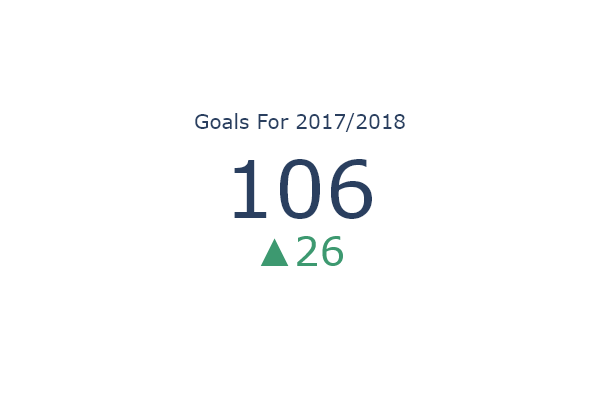

In [126]:
goals_for_17_18 = MC_17_18_goals_for.select("goals_for").collect()[0][0]
fig_goals_for_17_18 = go.Figure()
fig_goals_for_17_18.add_trace(go.Indicator(
    mode = "number+delta",
    delta = {'position': "bottom", 'reference': goals_for_16_17},
    value = goals_for_17_18,
    title = {"text": "Goals For 2017/2018", 'align': "center", },
    domain = {'x': [0, 1], 'y': [0, 1]}
    ))
fig_goals_for_17_18.update_layout(width=600, height=400)
fig_goals_for_17_18.show('png')

With 106, it is the best score of the team.

In [127]:
#I get the goals against done in home
MC_17_18_goals_against_home = MC_17_18.groupBy('home_team_id').sum('full_time_score_away_team').where("home_team_id == '167'"
          ).withColumnRenamed('sum(full_time_score_away_team)', 'goals_against').withColumnRenamed('home_team_id', 'team')

#I get the goals against done away
MC_17_18_goals_against_away = MC_17_18.groupBy('away_team_id').sum('full_time_score_home_team').where("away_team_id == '167'"
         ).withColumnRenamed('sum(full_time_score_home_team)', 'goals_against').withColumnRenamed('away_team_id', 'team')

#I get all goals against by union both home and away
MC_17_18_goals_against = MC_17_18_goals_against_home.union(MC_17_18_goals_against_away).groupBy('team').sum('goals_against'
                                                          ).withColumnRenamed('sum(goals_against)', 'goals_against')

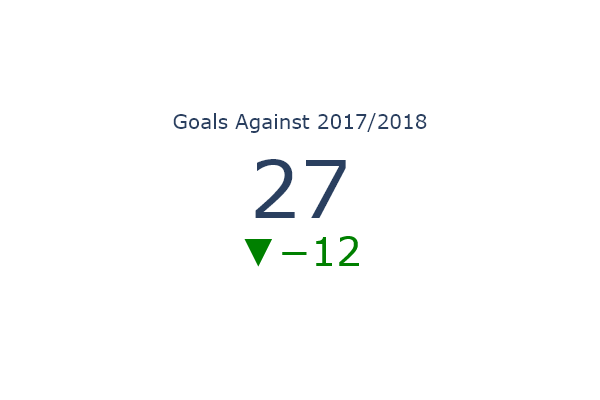

In [129]:
goals_against_17_18 = MC_17_18_goals_against.select("goals_against").collect()[0][0]
fig_goals_against_17_18 = go.Figure()
fig_goals_against_17_18.add_trace(go.Indicator(
    mode = "number+delta",
    delta = {'position': "bottom", 'reference': goals_against_16_17, "increasing": {"color": 'red', "symbol": '▲'}, 
             "decreasing": {"color": 'green', "symbol": '▼'}},
    value = goals_against_17_18,
    title = {"text": "Goals Against 2017/2018", 'align': "center"},
    domain = {'x': [0, 1], 'y': [0, 1]}
    ))
fig_goals_against_17_18.update_layout(width=600, height=400)
fig_goals_against_17_18.show('png')

General result of the season

In [130]:
MC_17_18_results = MC_17_18_home_results.union(MC_17_18_away_results)
MC_17_18_results = MC_17_18_results.groupBy('home_team_id','result').sum().withColumnRenamed('sum(matches)', 'matches')
MC_17_18_results.show()

+------------+------+-------+
|home_team_id|result|matches|
+------------+------+-------+
|         167|   Won|     32|
|         167| Drawn|      4|
|         167|  Lost|      2|
+------------+------+-------+



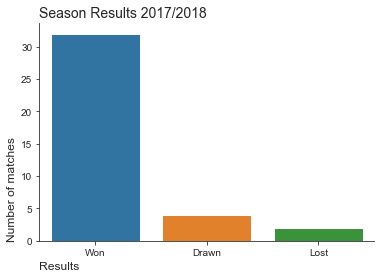

In [131]:
MC_17_18_results_plot = sns.barplot(x='result', y='matches', data=MC_17_18_results.toPandas())
MC_17_18_results_plot.set_ylabel('Number of matches', loc="bottom", fontsize=12)
MC_17_18_results_plot.set_xlabel('Results', loc="left", fontsize=12)
MC_17_18_results_plot.set_title('Season Results 2017/2018', loc="left", fontsize=14)
sns.despine()

With these results, this season is the best season of the team, and due to that the team won the league.

### Season Stats <a class="anchor" id="stats1718"></a>

I will analize now the stats of the season.

In [133]:
#Collect all stats from away matches
season_stats_17_18_away = season_stats_17_18.select(
"away_team.aggregate_stats.possession_percentage",
"away_team.aggregate_stats.ontarget_scoring_att",
"away_team.aggregate_stats.total_scoring_att",
"away_team.aggregate_stats.fk_foul_lost",
"away_team.aggregate_stats.goals",
"away_team.aggregate_stats.total_pass",
"away_team.aggregate_stats.accurate_pass",
"away_team.team_details.team_id",
).withColumnRenamed('possession_percentage', 'possession')\
.withColumnRenamed('accurate_pass', 'acc_pass')\
.withColumnRenamed('total_pass', 'passes')

#Collect all stats from home matches
season_stats_17_18_home = season_stats_17_18.select(
"home_team.aggregate_stats.possession_percentage",
"home_team.aggregate_stats.ontarget_scoring_att",
"home_team.aggregate_stats.total_scoring_att",
"home_team.aggregate_stats.fk_foul_lost",
"home_team.aggregate_stats.goals",
"home_team.aggregate_stats.total_pass",
"home_team.aggregate_stats.accurate_pass",
"home_team.team_details.team_id",
).withColumnRenamed('possession_percentage', 'possession')\
.withColumnRenamed('accurate_pass', 'acc_pass')\
.withColumnRenamed('total_pass', 'passes')

#Merge both stats
season_stats_17_18_results = season_stats_17_18_home.union(season_stats_17_18_away)

#Calculate the average of the stats
season_stats_17_18_results = season_stats_17_18_results.withColumn('passes_precision', (col('acc_pass') / col('passes')
                                                                                    ).cast(DecimalType(2,2)))\
.groupBy('team_id')\
.agg({"possession":"avg","goals":"sum", "ontarget_scoring_att":"avg", "total_scoring_att":"avg", "passes":"avg", 
      "passes_precision":"avg", "fk_foul_lost":"avg"})\
.withColumnRenamed('avg(fk_foul_lost)', 'fouls')\
.withColumnRenamed('avg(passes)', 'passes')\
.withColumnRenamed('avg(ontarget_scoring_att)', 'target_shots')\
.withColumnRenamed('avg(total_scoring_att)', 'shots')\
.withColumnRenamed('avg(possession)', 'possession')\
.withColumnRenamed('avg(passes_precision)', 'passes_prec')\
.withColumnRenamed('sum(goals)', 'goals')

#I do a join to get the team nome
season_stats_17_18_results = season_stats_17_18_results.join(season_match_stats_17_18, 
                  season_match_stats_17_18.home_team_id==season_stats_17_18_results.team_id,"inner")\
.select('home_team_name', 'fouls', 'passes', 'target_shots', 'shots', 'possession', 'goals', 'passes_prec'
     ).withColumnRenamed('home_team_name', 'name').dropDuplicates()

In [134]:
season_stats_17_18_results_pd = season_stats_17_18_results.toPandas().sort_values('possession', ascending=False)

#### Possession<a class="anchor" id="possession1718"></a>

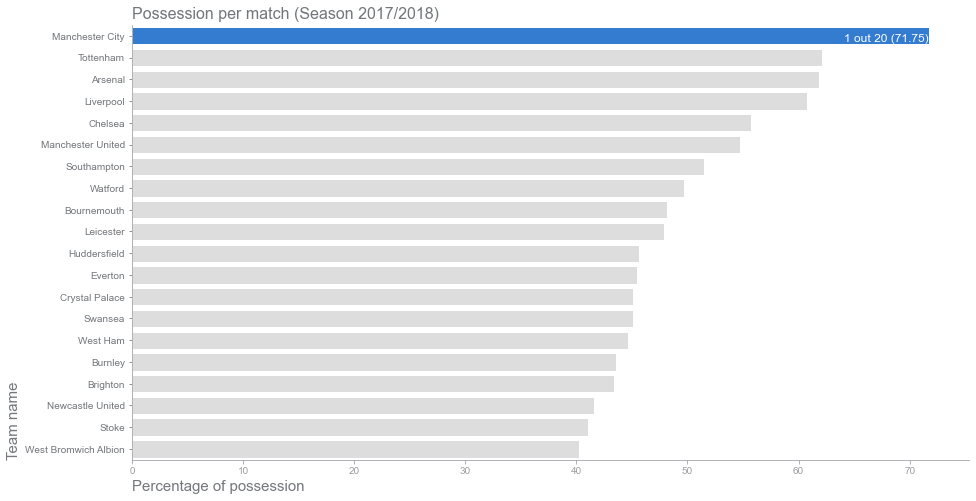

In [135]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
posession_plot = sns.barplot(y='name', x='possession', data=season_stats_17_18_results_pd.sort_values('possession',
                                                                        ascending=False), orient="h")

for bar in posession_plot.patches:
    if bar.get_width() == 71.75:
        bar.set_facecolor('#337CCF')
        posession_plot.annotate(f'1 out 20 ({bar.get_width():.2f})', (bar.get_x() + bar.get_width(),
            bar.get_y() + bar.get_height()- 0.05), ha='right', va='center', fontsize=12, color='white',xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

posession_plot.set_title('Possession per match (Season 2017/2018)', fontsize = 16, loc="left", color='#73777B')
posession_plot.set_xlabel('Percentage of possession', fontsize = 15, loc="left",  color='#73777B')
posession_plot.tick_params(axis='x', colors='#9E9FA5')
posession_plot.tick_params(axis='y', colors='#73777B')
posession_plot.spines['bottom'].set_color('#9E9FA5')
posession_plot.spines['left'].set_color('#9E9FA5')
_ = posession_plot.set_ylabel('Team name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

With huge difference of 10%, the team had the best average of possession by match.

#### Shots <a class="anchor" id="shots1718"></a>

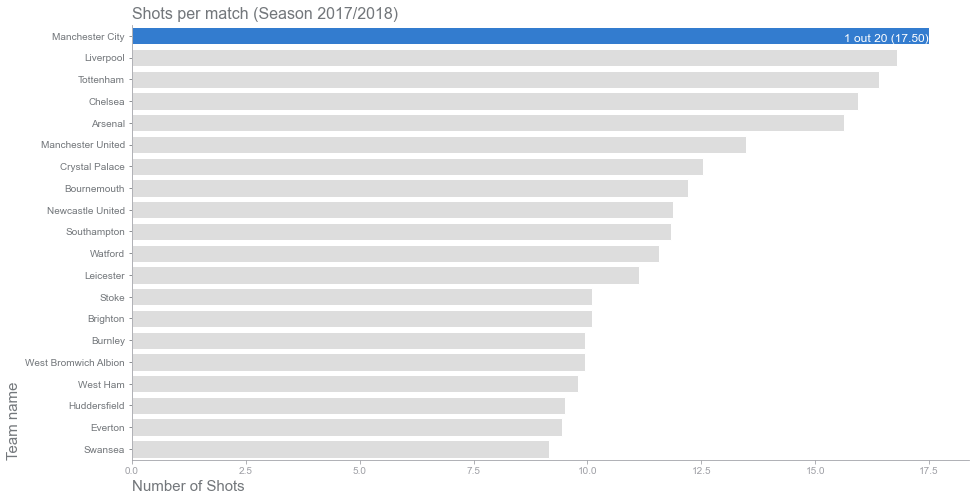

In [136]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
shots_plot = sns.barplot(y='name', x='shots', data=season_stats_17_18_results_pd.sort_values('shots', ascending=False), 
                             orient="h")

for bar in shots_plot.patches:
    if bar.get_width() == 17.5:
        bar.set_facecolor('#337CCF')
        shots_plot.annotate(f'1 out 20 ({bar.get_width():.2f})', (bar.get_x() + bar.get_width(),
            bar.get_y() + bar.get_height()- 0.05), ha='right', va='center', fontsize=12, color='white',xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

shots_plot.set_title('Shots per match (Season 2017/2018)', fontsize = 16, loc="left", color='#73777B')
shots_plot.set_xlabel('Number of Shots', fontsize = 15, loc="left",  color='#73777B')
shots_plot.tick_params(axis='x', colors='#9E9FA5')
shots_plot.tick_params(axis='y', colors='#73777B')
shots_plot.spines['bottom'].set_color('#9E9FA5')
shots_plot.spines['left'].set_color('#9E9FA5')
_ = shots_plot.set_ylabel('Team name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

The team overcomes in shots per match.

#### Shots in the target<a class="anchor" id="shotsTarget1718"></a>

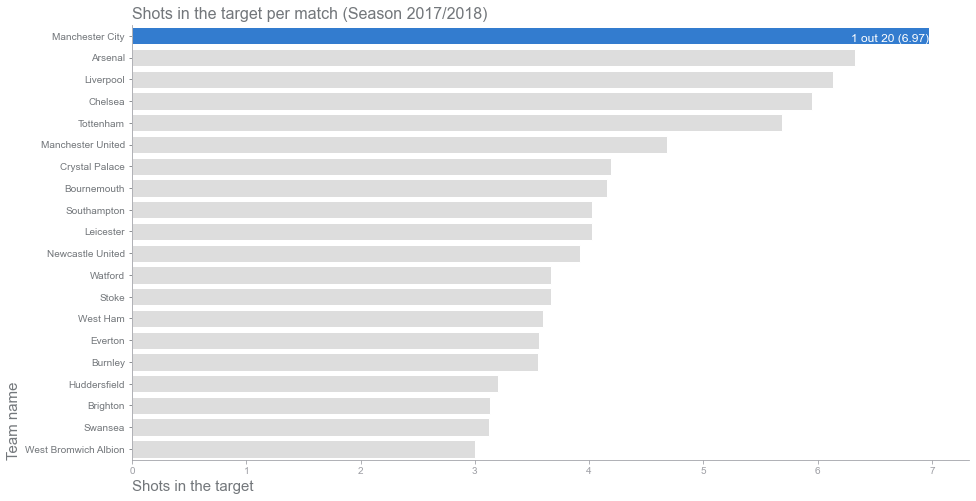

In [137]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
target_shots_plot = sns.barplot(y='name', x='target_shots', data=season_stats_17_18_results_pd.sort_values('target_shots', 
                                                            ascending=False), orient="h")

for bar in target_shots_plot.patches:
    if bar.get_width() == 6.973684210526316:
        bar.set_facecolor('#337CCF')
        target_shots_plot.annotate(f'1 out 20 ({bar.get_width():.2f})', (bar.get_x() + bar.get_width(),
            bar.get_y() + bar.get_height()- 0.05), ha='right', va='center', fontsize=12, color='white',xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

target_shots_plot.set_title('Shots in the target per match (Season 2017/2018)', fontsize = 16, loc="left", color='#73777B')
target_shots_plot.set_xlabel('Shots in the target', fontsize = 15, loc="left",  color='#73777B')
target_shots_plot.tick_params(axis='x', colors='#9E9FA5')
target_shots_plot.tick_params(axis='y', colors='#73777B')
target_shots_plot.spines['bottom'].set_color('#9E9FA5')
target_shots_plot.spines['left'].set_color('#9E9FA5')
_ = target_shots_plot.set_ylabel('Team name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

In this season, the team had most shots and shots on target, also they had a good precision. Additionally, the team commited 106 goals.

#### Passes precision<a class="anchor" id="passessPre1718"></a>

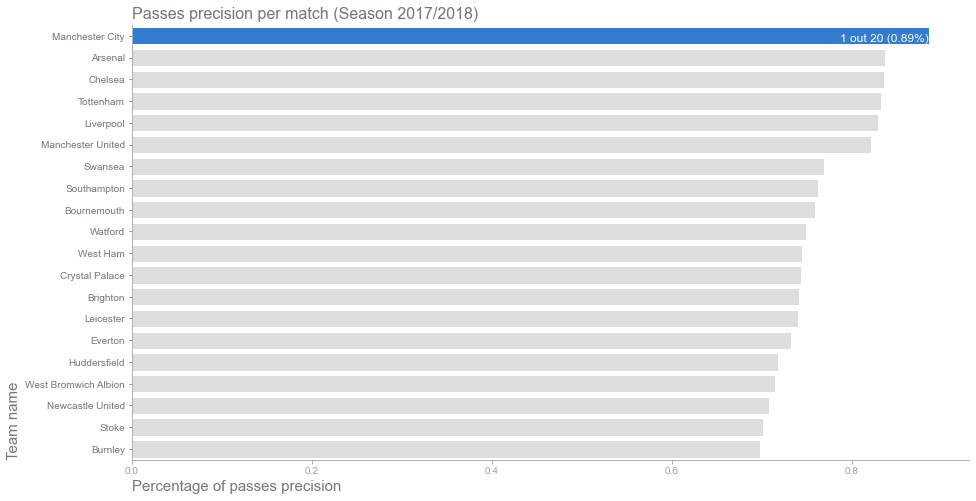

In [138]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
passes_prec_plot = sns.barplot(y='name', x='passes_prec', data=season_stats_17_18_results_pd.sort_values('passes_prec', 
                                                            ascending=False), orient="h")

for bar in passes_prec_plot.patches:
    if bar.get_width() == 0.885789:
        bar.set_facecolor('#337CCF')
        passes_prec_plot.annotate(f'1 out 20 ({bar.get_width():.2f}%)', (bar.get_x() + bar.get_width(),
            bar.get_y() + bar.get_height()- 0.05), ha='right', va='center', fontsize=12, color='white',xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

passes_prec_plot.set_title('Passes precision per match (Season 2017/2018)', fontsize = 16, loc="left", color='#73777B')
passes_prec_plot.set_xlabel('Percentage of passes precision', fontsize = 15, loc="left",  color='#73777B')
passes_prec_plot.tick_params(axis='x', colors='#9E9FA5')
passes_prec_plot.tick_params(axis='y', colors='#73777B')
passes_prec_plot.spines['bottom'].set_color('#9E9FA5')
passes_prec_plot.spines['left'].set_color('#9E9FA5')
_ = passes_prec_plot.set_ylabel('Team name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

The team led in precision with the passes.

#### Fouls<a class="anchor" id="fouls1718"></a>

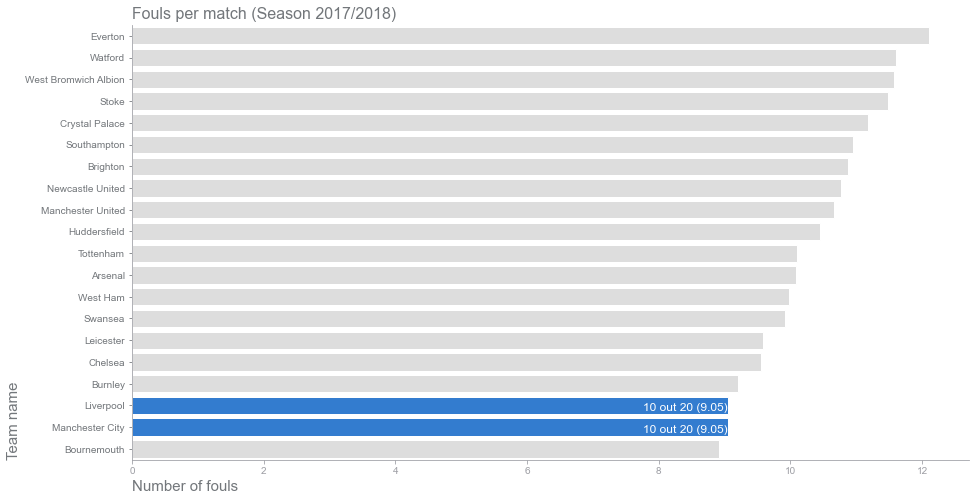

In [139]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
fouls_plot = sns.barplot(y='name', x='fouls', data=season_stats_17_18_results_pd.sort_values('fouls', 
                                                            ascending=False), orient="h")

for bar in fouls_plot.patches:
    if bar.get_width() == 9.052631578947368:
        bar.set_facecolor('#337CCF')
        fouls_plot.annotate(f'10 out 20 ({bar.get_width():.2f})', (bar.get_x() + bar.get_width(),
            bar.get_y() + bar.get_height()- 0.05), ha='right', va='center', fontsize=12, color='white',xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

fouls_plot.set_title('Fouls per match (Season 2017/2018)', fontsize = 16, loc="left", color='#73777B')
fouls_plot.set_xlabel('Number of fouls', fontsize = 15, loc="left",  color='#73777B')
fouls_plot.tick_params(axis='x', colors='#9E9FA5')
fouls_plot.tick_params(axis='y', colors='#73777B')
fouls_plot.spines['bottom'].set_color('#9E9FA5')
fouls_plot.spines['left'].set_color('#9E9FA5')
_ = fouls_plot.set_ylabel('Team name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

In this season also, the team is one of the team with fewest fouls.

#### Passes<a class="anchor" id="passes1718"></a>

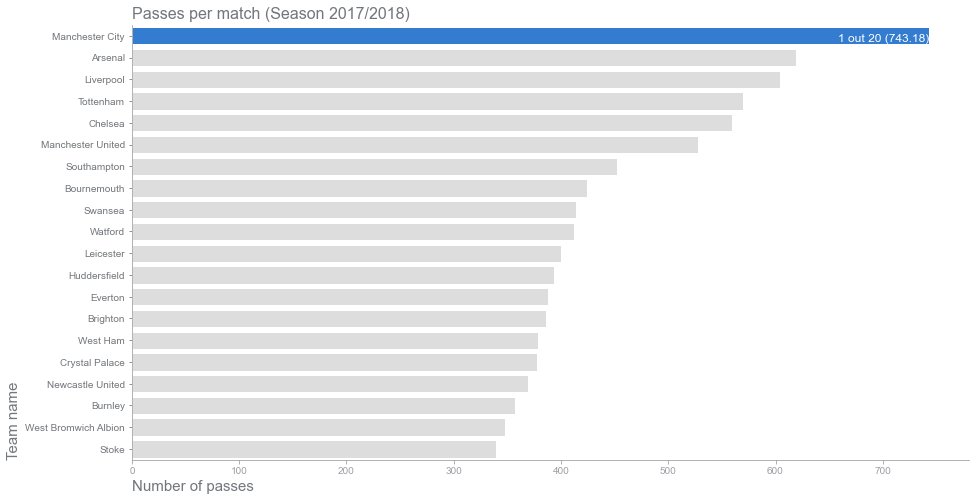

In [140]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 8))
passes_plot = sns.barplot(y='name', x='passes', data=season_stats_17_18_results_pd.sort_values('passes', 
                                                            ascending=False), orient="h")

for bar in passes_plot.patches:
    if bar.get_width() == 743.1842105263158:
        bar.set_facecolor('#337CCF')
        passes_plot.annotate(f'1 out 20 ({bar.get_width():.2f})', (bar.get_x() + bar.get_width(),
            bar.get_y() + bar.get_height()- 0.05), ha='right', va='center', fontsize=12, color='white',xytext=(0, 5),
                textcoords='offset points')
    else:
        bar.set_facecolor('#DDDDDD')

passes_plot.set_title('Passes per match (Season 2017/2018)', fontsize = 16, loc="left", color='#73777B')
passes_plot.set_xlabel('Number of passes', fontsize = 15, loc="left",  color='#73777B')
passes_plot.tick_params(axis='x', colors='#9E9FA5')
passes_plot.tick_params(axis='y', colors='#73777B')
passes_plot.spines['bottom'].set_color('#9E9FA5')
passes_plot.spines['left'].set_color('#9E9FA5')
_ = passes_plot.set_ylabel('Team name', fontsize = 15, loc="bottom", color='#73777B')
sns.despine()

Manchester City was the team with most passes, with a big difference. It makes sense because with this they keep the possession.

### Goals<a class="anchor" id="goals1718"></a>

In [141]:
#I cast the scores to allow the sum
season_match_stats_17_18 = season_match_stats_17_18.withColumn("half_time_score_home_team", 
                                 season_match_stats_17_18["half_time_score_home_team"].cast(IntegerType()))
season_match_stats_17_18 = season_match_stats_17_18.withColumn("half_time_score_away_team", 
                                 season_match_stats_17_18["half_time_score_away_team"].cast(IntegerType()))
season_match_stats_17_18 = season_match_stats_17_18.withColumn("full_time_score_home_team",
                                 season_match_stats_17_18["full_time_score_home_team"].cast(IntegerType()))
season_match_stats_17_18 = season_match_stats_17_18.withColumn("full_time_score_away_team",
                                 season_match_stats_17_18["full_time_score_away_team"].cast(IntegerType()))

#I get the goals for done in home
season_match_stats_17_18_goals_for_home = season_match_stats_17_18.groupBy('home_team_name').sum('full_time_score_home_team'
           ).withColumnRenamed('sum(full_time_score_home_team)', 'goals_for').withColumnRenamed('home_team_name', 'team')

#I get the goals for done away
season_match_stats_17_18_goals_for_away = season_match_stats_17_18.groupBy('away_team_name').sum('full_time_score_away_team'
           ).withColumnRenamed('sum(full_time_score_away_team)', 'goals_for').withColumnRenamed('away_team_name', 'team')

#I sum both home and away goals
season_match_stats_17_18_goals_for = season_match_stats_17_18_goals_for_home.union(season_match_stats_17_18_goals_for_away
                                ).groupBy('team').sum('goals_for').withColumnRenamed('sum(goals_for)', 'goals_for')

In [142]:
#I get the goals against done in home
season_match_stats_17_18_goals_against_home = season_match_stats_17_18.groupBy('home_team_name').sum('full_time_score_away_team'
           ).withColumnRenamed('sum(full_time_score_away_team)', 'goals_against').withColumnRenamed('home_team_name', 'team')

#I get the goals against done away
season_match_stats_17_18_goals_against_away = season_match_stats_17_18.groupBy('away_team_name').sum('full_time_score_home_team'
           ).withColumnRenamed('sum(full_time_score_home_team)', 'goals_against').withColumnRenamed('away_team_name', 'team')

# I sum both home and away goals against
season_match_stats_17_18_goals_against = season_match_stats_17_18_goals_against_home.union(
    season_match_stats_17_18_goals_against_away).groupBy('team').sum('goals_against').withColumnRenamed(
        'sum(goals_against)', 'goals_against')

#I merge both goals, for and against into the same table
season_match_stats_17_18_goals_against = season_match_stats_17_18_goals_against.withColumnRenamed('team', 'team2')
season_match_stats_17_18_goals = season_match_stats_17_18_goals_against.join(season_match_stats_17_18_goals_for, 
                    season_match_stats_17_18_goals_for.team==season_match_stats_17_18_goals_against.team2,"inner")

# I order by goals for
season_match_stats_17_18_goals_pd = season_match_stats_17_18_goals.orderBy("goals_for", ascending=False).toPandas()
season_match_stats_17_18_goals_pd = season_match_stats_17_18_goals_pd.drop('team2', axis=1)

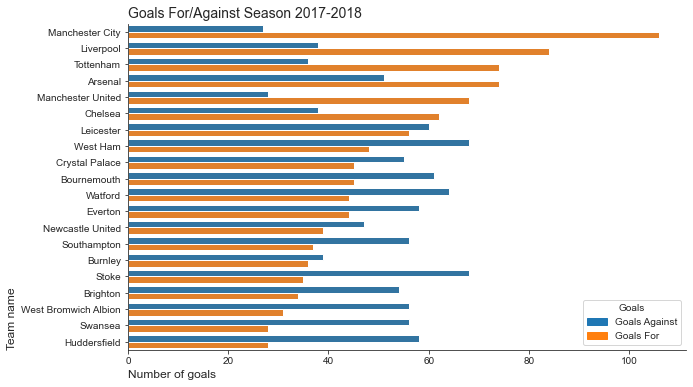

In [143]:
df_melted = pd.melt(season_match_stats_17_18_goals_pd, id_vars='team', var_name='Goals', value_name='Count')

plt.figure(figsize=(10, 6))
goals_1415_plot = sns.barplot(y='team', x='Count', hue='Goals', data=df_melted, orient='h')
goals_1415_plot.set_ylabel('Team name', fontsize=12, loc="bottom")
goals_1415_plot.set_xlabel('Number of goals', fontsize=12, loc="left")
goals_1415_plot.set_title('Goals For/Against Season 2017-2018', fontsize=14, loc="left")

palette = sns.color_palette(n_colors=len(df_melted['Goals'].unique()))
custom_legend = {'Goals Against': palette[0], 'Goals For': palette[1]}
handles = [plt.Rectangle((0,0),1,1, color=color) for color in custom_legend.values()]
legend = plt.legend(handles, custom_legend.keys(), title='Goals')
sns.despine()

Manchester City was the team with most number of goals for and the least number of goals against.

### Summary Season 2015/2016<a class="anchor" id="summary1718"></a>

There are not doubt that in numbers this season was the best of the team, and we can confirm that with the 106 goals for, and it was the team with the least goals against.

To won the league, they led possesion and passes with huge difference. Also have few fouls, and of corse, the shots and goals.

-----------------------------------------------------

## Seasons Comparation<a class="anchor" id="comparation"></a>

Now, I will compare the stats of the team through the four seasons, and I will analise what they have improved.

In [144]:
#I rename the team column for away matches
#This tables contain the number of Won, Lost and Drawn matches
MC_14_15_away_results = MC_14_15_away_results.withColumnRenamed('away_team_id', 'team_id')
MC_15_16_away_results = MC_15_16_away_results.withColumnRenamed('away_team_id', 'team_id')
MC_16_17_away_results = MC_16_17_away_results.withColumnRenamed('away_team_id', 'team_id')
MC_17_18_away_results = MC_17_18_away_results.withColumnRenamed('away_team_id', 'team_id')

In [145]:
#I rename the team column for home matches
#This tables contain the number of Won, Lost and Drawn matches
MC_14_15_home_results = MC_14_15_home_results.withColumnRenamed('home_team_id', 'team_id')
MC_15_16_home_results = MC_15_16_home_results.withColumnRenamed('home_team_id', 'team_id')
MC_16_17_home_results = MC_16_17_home_results.withColumnRenamed('home_team_id', 'team_id')
MC_17_18_home_results = MC_17_18_home_results.withColumnRenamed('home_team_id', 'team_id')

In [157]:
#Sum the results of each season
MC_14_15_results_sum = MC_14_15_away_results.union(MC_14_15_home_results)
MC_14_15_results_sum = MC_14_15_results_sum.groupBy('team_id', 'result').sum().withColumnRenamed('sum(matches)', 'matches')

MC_15_16_results_sum = MC_15_16_away_results.union(MC_15_16_home_results)
MC_15_16_results_sum = MC_15_16_results_sum.groupBy('team_id', 'result').sum().withColumnRenamed('sum(matches)', 'matches')

MC_16_17_results_sum = MC_16_17_away_results.union(MC_16_17_home_results)
MC_16_17_results_sum = MC_16_17_results_sum.groupBy('team_id', 'result').sum().withColumnRenamed('sum(matches)', 'matches')

MC_17_18_results_sum = MC_17_18_away_results.union(MC_17_18_home_results)
MC_17_18_results_sum = MC_17_18_results_sum.groupBy('team_id', 'result').sum().withColumnRenamed('sum(matches)', 'matches')

In [158]:
MC_14_15_results_sum_pd = MC_14_15_results_sum.toPandas()
MC_15_16_results_sum_pd = MC_15_16_results_sum.toPandas()
MC_16_17_results_sum_pd = MC_16_17_results_sum.toPandas()
MC_17_18_results_sum_pd = MC_17_18_results_sum.toPandas()

In [159]:
MC_14_15_results_sum_pd = MC_14_15_results_sum_pd[['result','matches']].T.reset_index()
MC_14_15_results_sum_pd.rename(columns={
    'index': 'season',
    0: 'Won', 
    1: 'Drawn', 
    2: 'Lost'
    }, inplace=True)
MC_14_15_results_sum_pd.drop(0, inplace=True)
MC_14_15_results_sum_pd['season'] = 2014

MC_15_16_results_sum_pd = MC_15_16_results_sum_pd[['result','matches']].T.reset_index()
MC_15_16_results_sum_pd.rename(columns={
    'index': 'season',
    0: 'Won', 
    1: 'Drawn', 
    2: 'Lost'
    }, inplace=True)
MC_15_16_results_sum_pd.drop(0, inplace=True)
MC_15_16_results_sum_pd['season'] = 2015

MC_16_17_results_sum_pd = MC_16_17_results_sum_pd[['result','matches']].T.reset_index()
MC_16_17_results_sum_pd.rename(columns={
    'index': 'season',
    0: 'Won', 
    1: 'Drawn', 
    2: 'Lost'
    }, inplace=True)
MC_16_17_results_sum_pd.drop(0, inplace=True)
MC_16_17_results_sum_pd['season'] = 2016

MC_17_18_results_sum_pd = MC_17_18_results_sum_pd[['result','matches']].T.reset_index()
MC_17_18_results_sum_pd.rename(columns={
    'index': 'season',
    0: 'Won', 
    1: 'Drawn', 
    2: 'Lost'
    }, inplace=True)
MC_17_18_results_sum_pd.drop(0, inplace=True)
MC_17_18_results_sum_pd['season'] = 2017

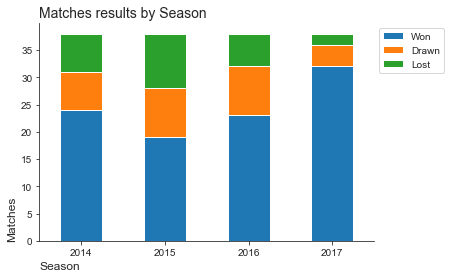

In [161]:
#I concat all the seasons in order to compare them
palette = sns.color_palette(n_colors=3)
MC_season_results = pd.concat([MC_14_15_results_sum_pd, MC_15_16_results_sum_pd, MC_16_17_results_sum_pd, MC_17_18_results_sum_pd])
MC_season_results_plot = MC_season_results.plot(x='season', kind='bar', stacked=True, color=[palette[0], palette[1], palette[2]])
MC_season_results_plot.set_title('Matches results by Season', fontsize = 14, loc="left")
MC_season_results_plot.set_xlabel('Season', loc='left', fontsize=12)
MC_season_results_plot.set_ylabel('Matches', loc='bottom', fontsize=12)

plt.setp(plt.gca().get_xticklabels(), rotation=0)  # Rotate the x-axis tick labels by 45 degrees
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
sns.despine()
plt.show()

Analyzing the results, the season 2015 was the worst season with the most number of lost matches. When Josep Guardiola arrived in 2016, the team improved a little, as a season of adaptation to the Premier League for him, winning more matches than the season before. Then in the season 2017, it was the season the most of won matches, and with only 4 draws and 2 lost.

Now let's see the goals for and against of all the seasons.

In [162]:
MC_14_15_goals_for2 = MC_14_15_goals_for.withColumn('season', lit('2014'))
MC_15_16_goals_for2 = MC_15_16_goals_for.withColumn('season', lit('2015'))
MC_16_17_goals_for2 = MC_16_17_goals_for.withColumn('season', lit('2016'))
MC_17_18_goals_for2 = MC_17_18_goals_for.withColumn('season', lit('2017'))

MC_14_15_goals_against2 = MC_14_15_goals_against.withColumn('season', lit('2014'))
MC_15_16_goals_against2 = MC_15_16_goals_against.withColumn('season', lit('2015'))
MC_16_17_goals_against2 = MC_16_17_goals_against.withColumn('season', lit('2016'))
MC_17_18_goals_against2 = MC_17_18_goals_against.withColumn('season', lit('2017'))

In [163]:
#I union the goals for and against of all the seasons in order to plot and compare them
MC_goals_for  = MC_14_15_goals_for2.union(MC_15_16_goals_for2).union(MC_16_17_goals_for2).union(MC_17_18_goals_for2)
MC_goals_against  = MC_14_15_goals_against2.union(MC_15_16_goals_against2).union(MC_16_17_goals_against2
                                                                                ).union(MC_17_18_goals_against2)

MC_goals_for_pd = MC_goals_for.toPandas()
MC_goals_against_pd = MC_goals_against.toPandas()

In [166]:
MC_goals_for_pd['goals_against'] = MC_goals_against_pd[['goals_against']]

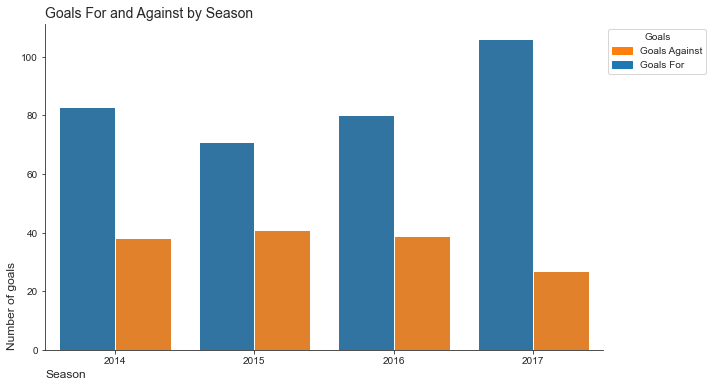

In [167]:
df_melted = pd.melt(MC_goals_for_pd[['season', 'goals_for', 'goals_against']], id_vars='season', var_name='goals', 
                    value_name='number')

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='number', hue='goals', data=df_melted)
pallete = sns.color_palette(n_colors=len(df_melted['goals'].unique()))
custom_legend = {'Goals Against': palette[1], 'Goals For': palette[0]}
handles = [plt.Rectangle((0,0),1,1, color=color) for color in custom_legend.values()]
legend = plt.legend(handles, custom_legend.keys(), title='Goals', bbox_to_anchor=(1, 1))

plt.xlabel('Season', loc='left', fontsize=12)
plt.ylabel('Number of goals', loc='bottom', fontsize=12)
plt.title('Goals For and Against by Season', loc='left', fontsize=14)
sns.despine()
plt.show()

In the worst season of the team (2015), they have the least number of goals for with 71, and more goals against if we compare with the previous season. In 2016, they commited more goals, but also they had a little more of goals against. Then in 2017, they commited the most number of goals, and also they received the least number of goals with 27. Ending the season with a goal difference of +79.

To conclude, I will compare the different stats like shots, goals, passes, possession and fouls.

In [168]:
MC_season_stats_14_15_results_pd = season_stats_14_15_results_pd[season_stats_14_15_results_pd['name']=='Manchester City']
MC_season_stats_14_15_results_pd['season'] = '2014'
MC_season_stats_14_15_results_pd

MC_season_stats_15_16_results_pd = season_stats_15_16_results_pd[season_stats_15_16_results_pd['name']=='Manchester City']
MC_season_stats_15_16_results_pd['season'] = '2015'
MC_season_stats_15_16_results_pd

MC_season_stats_16_17_results_pd = season_stats_16_17_results_pd[season_stats_16_17_results_pd['name']=='Manchester City']
MC_season_stats_16_17_results_pd['season'] = '2016'
MC_season_stats_16_17_results_pd

MC_season_stats_17_18_results_pd = season_stats_17_18_results_pd[season_stats_17_18_results_pd['name']=='Manchester City']
MC_season_stats_17_18_results_pd['season'] = '2017'
MC_season_stats_17_18_results_pd

MC_season_stats_results = pd.concat([MC_season_stats_14_15_results_pd, MC_season_stats_15_16_results_pd, 
                                     MC_season_stats_16_17_results_pd, MC_season_stats_17_18_results_pd])
MC_season_stats_results

,name,fouls,passes,shots,target_shots,possession,goals,passes_prec,season
18,Manchester City,11.710526,581.763158,17.631579,6.026316,59.636842,83.0,0.838684,2014
12,Manchester City,10.763158,539.157895,16.184211,5.526316,56.950000,71.0,0.823684,2015
17,Manchester City,10.394737,597.526316,16.657895,5.684211,64.884211,80.0,0.851842,2016
12,Manchester City,9.052632,743.184211,17.500000,6.973684,71.750000,106.0,0.885789,2017


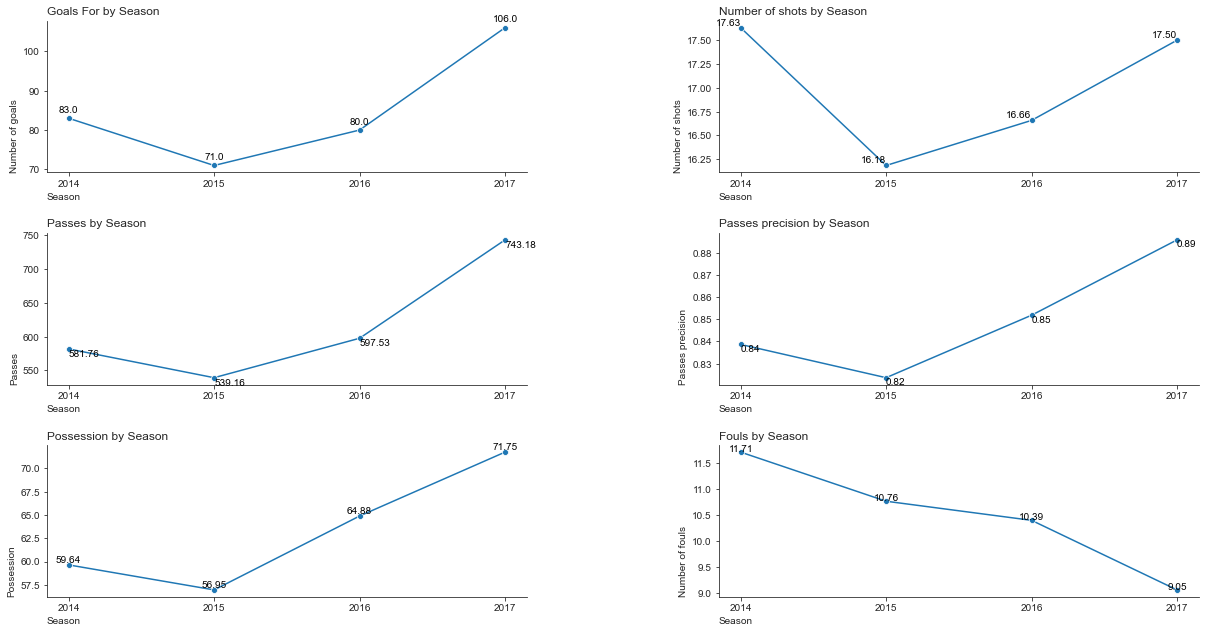

In [169]:
fig, axes = plt.subplots(3, 2, figsize=(20, 10), sharex=False, sharey=False)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

shots_seasons = sns.lineplot(ax=axes[0,1], data=MC_season_stats_results, x="season", y="shots", marker="o")
for index, row in MC_season_stats_results.iterrows():
    formatted_value = '{:.2f}'.format(row['shots'])
    shots_seasons.text(row["season"], row["shots"] + 0.1, formatted_value, ha='right', va='top', color='black')
shots_seasons.set_xlabel('Season', loc='left')
shots_seasons.set_ylabel('Number of shots', loc='bottom')
shots_seasons.set_title('Number of shots by Season', loc='left')


goals_seasons = sns.lineplot(ax=axes[0,0], data=MC_season_stats_results, x="season", y="goals", marker="o")
for index, row in MC_season_stats_results.iterrows():
    goals_seasons.text(row["season"], row["goals"] + 1, str(row["goals"]), ha='center', va='bottom', color='black')
goals_seasons.set_xlabel('Season', loc='left')
goals_seasons.set_ylabel('Number of goals', loc='bottom')
goals_seasons.set_title('Goals For by Season', loc='left')

passes_seasons = sns.lineplot(ax=axes[1,0], data=MC_season_stats_results, x="season", y="passes", marker="o")
for index, row in MC_season_stats_results.iterrows():
    formatted_value = '{:.2f}'.format(row['passes'])
    passes_seasons.text(row["season"], row["passes"] -1, formatted_value, va='top', ha='left', color='black')
passes_seasons.set_xlabel('Season', loc='left')
passes_seasons.set_ylabel('Passes', loc='bottom')
passes_seasons.set_title('Passes by Season', loc='left')

passes_prec_seasons = sns.lineplot(ax=axes[1,1], data=MC_season_stats_results, x="season", y="passes_prec", marker="o")
for index, row in MC_season_stats_results.iterrows():
    formatted_value = '{:.2f}'.format(row['passes_prec'])
    passes_prec_seasons.text(row["season"], row["passes_prec"], formatted_value, va='top', ha='left', color='black')
    
passes_prec_seasons.set_xlabel('Season', loc='left')
passes_prec_seasons.set_ylabel('Passes precision', loc='bottom')
passes_prec_seasons.set_title('Passes precision by Season', loc='left')

possession_seasons = sns.lineplot(ax=axes[2,0], data=MC_season_stats_results, x="season", y="possession", marker="o")
for index, row in MC_season_stats_results.iterrows():
    formatted_value = '{:.2f}'.format(row['possession'])  
    possession_seasons.text(row["season"], row["possession"] + 1, formatted_value, ha='center', va='top', color='black')
possession_seasons.set_xlabel('Season', loc='left')
possession_seasons.set_ylabel('Possession', loc='bottom')
possession_seasons.set_title('Possession by Season', loc='left')

fouls_seasons = sns.lineplot(ax=axes[2,1], data=MC_season_stats_results, x="season", y="fouls", marker="o")
for index, row in MC_season_stats_results.iterrows():
    formatted_value = '{:.2f}'.format(row['fouls'])
    fouls_seasons.text(row["season"], row["fouls"] +0.15, formatted_value, ha='center', va='top', color='black')
fouls_seasons.set_xlabel('Season', loc='left')
fouls_seasons.set_ylabel('Number of fouls', loc='bottom')
fouls_seasons.set_title('Fouls by Season', loc='left')

sns.despine()

Here we can see in the plots how the team improved their stats, managening the possession and precision, commiting more shots and less fouls.

The seasom 2017, was the season where the team have the least number the fouls, and the best numbers of posession, passes and shots. Also we can say that the team has improved with the arrival of Guardiola in 2016.

As we saw, the possession is not guarantee of victory, but that with less fouls and improving the passes and precision seem to be a big part of the road to get the league.